In [29]:
# https://portal.brain-map.org/atlases-and-data/rnaseq/mouse-whole-cortex-and-hippocampus-smart-seq
# https://idk-etl-prod-download-bucket.s3.amazonaws.com/aibs_mouse_ctx-hpf_smart-seq/Seurat.ss.rda
# Gene expression matrix (Seurat) 	5.4 GB 	.ss.rda 
# This Seurat object contains the cell-by-gene expression matrix, with introns and exons combined.

library(Seurat)
library(ggplot2)
library(dplyr)
library(reshape2)
library(cowplot)
`%nin%` = Negate(`%in%`)

In [6]:
load('./Seurat.ss.rda')
ls()

[1] "%nin%"     "ss.seurat"

In [7]:
meta = read.csv('JUN6/annotation 20200913-Table 1.csv',header=T)

In [8]:
# for(cid in unique(meta[,c('cluster_id')])){
#     clab = unique(subset(ss.seurat@meta.data, cluster_id==cid)$cluster_label)
#     cmlab = unique(subset(meta,cluster_id==cid)$cluster_label)

#     if(rlang::is_empty(clab) || clab != cmlab){
#         print(paste(cid,clab,cmlab))
#     }
# }


In [9]:
my_ref = subset(ss.seurat, region_label %in% c('ALM','SSp','VISp','SSs','VIS'))
t(table(my_ref@meta.data$class_label,my_ref@meta.data$region_label))

      
       GABAergic Glutamatergic Non-Neuronal
  ALM       4469          4615          583
  SSp        781          4859           25
  SSs        413          1384           69
  VIS        229          3155            2
  VISp      6617          8217          738

In [10]:
ins = subset(my_ref,class_label=='GABAergic')
exc = subset(my_ref,class_label=='Glutamatergic')
nn = subset(my_ref,class_label=='Non-Neuronal')
table(exc@meta.data$subclass_label,exc@meta.data$region_label)

                 
                   ALM  SSp  SSs  VIS VISp
  Car3               1   11  419   45   75
  CR                14    0    0    0   22
  DG                 0    0    0    0    1
  L2/3 IT CTX      343 1001  219  856 1021
  L2/3 IT PPP        0    0    0   20    1
  L4/5 IT CTX     1911 1387  365 1218 1873
  L5 IT CTX        829  352   61  166  880
  L5 PT CTX        373   47   18  150  845
  L5/6 IT TPE-ENT    0    0    2   34    4
  L5/6 NP CTX      562  233   25   55  413
  L6 CT CTX        357  546  182  293  945
  L6 IT CTX         82  689   84  300 1808
  L6b CTX          143  593    9   16  329
  L6b/CT ENT         0    0    0    2    0

In [11]:
ins@meta.data$supertype_label = dplyr::recode(ins@meta.data$cluster_label, "114_Pvalb"="Pvalb Lpl","43_Vip"="Vip Pcdh11x","12_Lamp5"="Lamp5 Pdlim5","69_Sst"="Sst Syndig1l","45_Vip"="Vip Pcdh11x","51_Vip"="Vip Cp Rspo1","97_Sst"="Sst Hpse","64_Sst Chodl"="Sst Chodl","42_Vip"="Vip Pcdh11x","16_Lamp5"="Lamp5 Egln3","60_Vip Igfbp6"="Vip Igfbp6","44_Vip"="Vip Mybpc1","18_Lamp5"="Lamp5 Egln3","59_Vip Igfbp6"="Vip Igfbp6","46_Vip"="Vip Pcdh11x","115_Pvalb"="Pvalb Lpl","50_Vip"="Vip Cp Rspo1","57_Vip Igfbp6"="Vip Igfbp6","37_Sncg"="Sncg Jam2 Npy2r","61_Vip Igfbp6"="Vip Igfbp6","11_Lamp5"="Lamp5 Pdlim5","15_Lamp5"="Lamp5 Egln3","109_Pvalb"="Pvalb Th","14_Lamp5"="Lamp5 Egln3","68_Sst"="Sst Syndig1l","116_Pvalb"="Pvalb Lpl","119_Pvalb"="Pvalb Lpl","73_Sst"="Sst Crh","111_Pvalb"="Pvalb Lpl","118_Pvalb"="Pvalb Lpl","112_Pvalb"="Pvalb Lpl","86_Sst"="Sst Etv1","84_Sst"="Sst Myh8","53_Vip"="Vip Lmo1","71_Sst"="Sst Crh","82_Sst"="Sst Myh8","35_Sncg"="Sncg Jam2 Npy2r","74_Sst"="Sst Crh","88_Sst"="Sst Nmbr","108_Pvalb"="Pvalb Th","7_Lamp5 Lhx6"="Lamp5 Lhx6","85_Sst"="Sst Etv1","33_Sncg"="Sncg Krt73","13_Lamp5"="Lamp5 Egln3","123_Pvalb Vipr2"="Pvalb Vipr2","19_Pax6"="Pax6","62_Vip Igfbp6"="Vip Igfbp6","40_Vip"="Vip Serpinf1","113_Pvalb"="Pvalb Lpl","81_Sst"="Sst Myh8","22_Sncg"="Sncg Serpinf1","98_Sst"="Sst Calb2","76_Sst"="Sst Nts","66_Sst"="Sst Syndig1l","24_Sncg"="Sncg Serpinf1","99_Sst"="Sst Mme","100_Sst"="Sst Mme","79_Sst"="Sst Myh8","96_Sst"="Sst Hpse","36_Sncg"="Sncg Jam2 Npy2r","52_Vip"="Vip Lmo1","75_Sst"="Sst Crh","48_Vip"="Vip Cp Rspo1","49_Vip"="Vip Cp Rspo1","90_Sst"="Sst Nmbr","6_Lamp5 Lhx6"="Lamp5 Lhx6","47_Vip"="Vip Pcdh11x","89_Sst"="Sst Nmbr","91_Sst"="Sst Nmbr","92_Sst"="Sst Nmbr","83_Sst"="Sst Myh8","70_Sst"="Sst Crh","93_Sst"="Sst Nmbr","67_Sst"="Sst Syndig1l","94_Sst"="Sst Nmbr","80_Sst"="Sst Myh8","65_Sst Chodl"="Sst Chodl","41_Vip"="Vip Serpinf1","23_Sncg"="Sncg Serpinf1","63_Sst Chodl"="Sst Chodl","117_Pvalb"="Pvalb Lpl","58_Vip Igfbp6"="Vip Igfbp6","31_Sncg"="Sncg Krt73","3_Meis2"="Meis2","38_Sncg"="Sncg Jam2 Npy2r","95_Sst"="Sst Nmbr","110_Pvalb"="Pvalb Th","10_Lamp5"="Lamp5 Pdlim5","21_Sncg"="Sncg Serpinf1","20_Pax6"="Pax6","56_Vip HPF"="Vip Cbln4 HPF","28_Ntng1 HPF"="Ntng1 HPF","105_Sst HPF"="Sst Ctsc HPF","27_Ntng1 HPF"="Ntng1 HPF","17_Lamp5"="Lamp5 Egln3","2_Meis2"="Meis2","25_Sncg"="Sncg Krt73","121_Pvalb"="Pvalb Lpl","72_Sst"="Sst Crh")
ins = subset(ins, supertype_label %nin% c('Meis2','Ntng1 HPF','Sst Ctsc HPF','Vip Cbln4 HPF'))

exc = subset(exc, subclass_label %nin% c('CR','DG','L2/3 IT PPP','L5/6 IT TPE-ENT','L6b/CT ENT'))
exc = subset(exc, region_label %in% c('SSp','SSs'))

cmb = subset(my_ref, cells = c(colnames(nn),colnames(exc),colnames(ins)))

In [12]:
rep = ""
for(x in unique(cmb@meta.data$cluster_label)){
    sl = subset(meta,cluster_label == x,supertype_label)
    rep = paste0(rep,x,'"="',sl,'","')
}

In [13]:
cmb@meta.data$supertype_label = dplyr::recode(cmb@meta.data$cluster_label,"367_Oligo"="Oligo Neu4","375_Oligo"="Oligo Opalin","374_Oligo"="Oligo Opalin","376_Astro"="Astro Slc7a10","379_Endo"="Endo Tek","381_SMC-Peri"="Peri Atp13a5","365_Oligo"="Oligo Pdgfra","386_Micro-PVM"="MIcro Siglech","371_Oligo"="Oligo Enpp6","373_Oligo"="Oligo Opalin","377_Astro"="Astro Gfap Apoe","370_Oligo"="Oligo Enpp6","387_Micro-PVM"="PVM Mrc1","388_Micro-PVM"="PVM Mrc1","384_VLMC"="VLMC Dcn","383_VLMC"="VLMC Dcn","366_Oligo"="Oligo Pdgfra","378_Astro"="Astro Gfap Apoe","369_Oligo"="Oligo Enpp6","368_Oligo"="Oligo Neu4","382_SMC-Peri"="Peri Atp13a5","380_SMC-Peri"="SMC Acta2","385_VLMC"="VLMC Dcn","372_Oligo"="Oligo Opalin","267_L5/6 NP CTX"="L5/6 NP CTX Sla2","182_L4/5 IT CTX"="L4/5 IT CTX Cux2 Etv1","265_L5/6 NP CTX"="L5/6 NP CTX Sla2","218_L6 IT CTX"="L6 IT CTX Fst","199_L5 IT CTX"="L5 IT CTX Foxo1","200_L5 IT CTX"="L5 IT CTX Foxo1","168_L2/3 IT CTX"="L2/3 IT CTX Stard8","166_L2/3 IT CTX"="L2/3 IT CTX Stard8","240_L5 PT CTX"="L5 PT CTX Chrna6","247_L5 PT CTX"="L5 PT CTX Npnt","290_L6 CT CTX"="L6 CT CTX Syt6","204_L5/6 IT CTX"="L5/6 IT CTX Cdh9","171_L2/3 IT CTX"="L2/3 IT CTX Baz1a","206_L5/6 IT CTX"="L5/6 IT CTX Cdh9","188_L4/5 IT CTX"="L4/5 IT CTX Cux2 Etv1","201_L5 IT CTX"="L5 IT CTX Foxo1","179_L4 IT CTX"="L4 IT CTX Rspo1","228_L6 IT CTX"="L6 IT CTX Osr1","227_L6 IT CTX"="L6 IT CTX Osr1","223_L6 IT CTX"="L6 IT CTX Osr1","209_L5/6 IT CTX"="L5/6 IT CTX Cdh9","289_L6 CT CTX"="L6 CT CTX Syt6","284_L6 CT CTX"="L6 CT CTX Syt6","236_Car3"="Car3","266_L5/6 NP CTX"="L5/6 NP CTX Sla2","250_L5 PT CTX"="L5 PT CTX Cdh13","191_L4/5 IT CTX"="L4/5 IT CTX Cux2 Etv1","287_L6 CT CTX"="L6 CT CTX Syt6","248_L5 PT CTX"="L5 PT CTX Npnt","190_L4/5 IT CTX"="L4/5 IT CTX Cux2 Etv1","246_L5 PT CTX"="L5 PT CTX Npnt","292_L6 CT CTX"="L6 CT CTX Syt6","178_L4 IT CTX"="L4 IT CTX Rspo1","288_L6 CT CTX"="L6 CT CTX Syt6","208_L5/6 IT CTX"="L5/6 IT CTX Cdh9","283_L6 CT CTX"="L6 CT CTX Syt6","220_L6 IT CTX"="L6 IT CTX Fst","238_Car3"="Car3","312_L6b CTX"="L6b CTX Clic5","226_L6 IT CTX"="L6 IT CTX Osr1","317_L6b CTX"="L6b CTX Slc17a8","219_L6 IT CTX"="L6 IT CTX Fst","230_L6 IT CTX"="L6 IT CTX Osr1","307_L6b CTX"="L6b CTX Clic5","315_L6b CTX"="L6b CTX Clic5","217_L6 IT CTX"="L6 IT CTX Fst","304_L6b CTX"="L6b CTX Clic5","313_L6b CTX"="L6b CTX Clic5","205_L5/6 IT CTX"="L5/6 IT CTX Cdh9","197_L5 IT CTX"="L5 IT CTX Foxo1","306_L6b CTX"="L6b CTX Clic5","316_L6b CTX"="L6b CTX Clic5","311_L6b CTX"="L6b CTX Clic5","252_L5 PT CTX"="L5 PT CTX Cdh13","237_Car3"="Car3","305_L6b CTX"="L6b CTX Clic5","162_L2/3 IT CTX"="L2/3 IT CTX Trhr","167_L2/3 IT CTX"="L2/3 IT CTX Stard8","180_L4 IT CTX"="L4 IT CTX Rspo1","187_L4/5 IT CTX"="L4/5 IT CTX Cux2 Etv1","222_L6 IT CTX"="L6 IT CTX Osr1","186_L4/5 IT CTX"="L4/5 IT CTX Cux2 Etv1","184_L4/5 IT CTX"="L4/5 IT CTX Cux2 Etv1","229_L6 IT CTX"="L6 IT CTX Osr1","183_L4/5 IT CTX"="L4/5 IT CTX Cux2 Etv1","185_L4/5 IT CTX"="L4/5 IT CTX Cux2 Etv1","282_L6 CT CTX"="L6 CT CTX Syt6","164_L2/3 IT CTX"="L2/3 IT CTX Trhr","192_L4/5 IT CTX"="L4/5 IT CTX Cux2 Etv1","253_L5 PT CTX"="L5 PT CTX Cdh13","243_L5 PT CTX"="L5 PT CTX Npnt","114_Pvalb"="Pvalb Lpl","43_Vip"="Vip Pcdh11x","12_Lamp5"="Lamp5 Pdlim5","69_Sst"="Sst Syndig1l","45_Vip"="Vip Pcdh11x","51_Vip"="Vip Cp Rspo1","97_Sst"="Sst Hpse","64_Sst Chodl"="Sst Chodl","42_Vip"="Vip Pcdh11x","16_Lamp5"="Lamp5 Egln3","60_Vip Igfbp6"="Vip Igfbp6","44_Vip"="Vip Mybpc1","18_Lamp5"="Lamp5 Egln3","59_Vip Igfbp6"="Vip Igfbp6","46_Vip"="Vip Pcdh11x","115_Pvalb"="Pvalb Lpl","50_Vip"="Vip Cp Rspo1","57_Vip Igfbp6"="Vip Igfbp6","37_Sncg"="Sncg Jam2 Npy2r","61_Vip Igfbp6"="Vip Igfbp6","11_Lamp5"="Lamp5 Pdlim5","15_Lamp5"="Lamp5 Egln3","109_Pvalb"="Pvalb Th","14_Lamp5"="Lamp5 Egln3","68_Sst"="Sst Syndig1l","116_Pvalb"="Pvalb Lpl","119_Pvalb"="Pvalb Lpl","73_Sst"="Sst Crh","111_Pvalb"="Pvalb Lpl","118_Pvalb"="Pvalb Lpl","112_Pvalb"="Pvalb Lpl","86_Sst"="Sst Etv1","84_Sst"="Sst Myh8","53_Vip"="Vip Lmo1","71_Sst"="Sst Crh","82_Sst"="Sst Myh8","35_Sncg"="Sncg Jam2 Npy2r","74_Sst"="Sst Crh","88_Sst"="Sst Nmbr","108_Pvalb"="Pvalb Th","7_Lamp5 Lhx6"="Lamp5 Lhx6","85_Sst"="Sst Etv1","33_Sncg"="Sncg Krt73","13_Lamp5"="Lamp5 Egln3","123_Pvalb Vipr2"="Pvalb Vipr2","19_Pax6"="Pax6","62_Vip Igfbp6"="Vip Igfbp6","40_Vip"="Vip Serpinf1","113_Pvalb"="Pvalb Lpl","81_Sst"="Sst Myh8","22_Sncg"="Sncg Serpinf1","98_Sst"="Sst Calb2","76_Sst"="Sst Nts","66_Sst"="Sst Syndig1l","24_Sncg"="Sncg Serpinf1","99_Sst"="Sst Mme","100_Sst"="Sst Mme","79_Sst"="Sst Myh8","96_Sst"="Sst Hpse","36_Sncg"="Sncg Jam2 Npy2r","52_Vip"="Vip Lmo1","75_Sst"="Sst Crh","48_Vip"="Vip Cp Rspo1","49_Vip"="Vip Cp Rspo1","90_Sst"="Sst Nmbr","6_Lamp5 Lhx6"="Lamp5 Lhx6","47_Vip"="Vip Pcdh11x","89_Sst"="Sst Nmbr","91_Sst"="Sst Nmbr","92_Sst"="Sst Nmbr","83_Sst"="Sst Myh8","70_Sst"="Sst Crh","93_Sst"="Sst Nmbr","67_Sst"="Sst Syndig1l","94_Sst"="Sst Nmbr","80_Sst"="Sst Myh8","65_Sst Chodl"="Sst Chodl","41_Vip"="Vip Serpinf1","23_Sncg"="Sncg Serpinf1","63_Sst Chodl"="Sst Chodl","117_Pvalb"="Pvalb Lpl","58_Vip Igfbp6"="Vip Igfbp6","31_Sncg"="Sncg Krt73","38_Sncg"="Sncg Jam2 Npy2r","95_Sst"="Sst Nmbr","110_Pvalb"="Pvalb Th","10_Lamp5"="Lamp5 Pdlim5","21_Sncg"="Sncg Serpinf1","20_Pax6"="Pax6","17_Lamp5"="Lamp5 Egln3","25_Sncg"="Sncg Krt73","121_Pvalb"="Pvalb Lpl","72_Sst"="Sst Crh")
cmb@meta.data$supertype_label = dplyr::recode(cmb@meta.data$supertype_label, "Sst Nts" = "PV/SST Th", "Pvalb Th" = "PV/SST Th")
cmb@meta.data$supertype_label = dplyr::recode(cmb@meta.data$supertype_label, "Pax6" = "Lamp5 Pax6")
cmb = subset(cmb, region_label !='VIS')

In [15]:
P28 = readRDS('./JUN6/CX_P28_filtered2_05312022.rds')

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10032
Number of edges: 477406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8231
Number of communities: 31
Elapsed time: 2 seconds


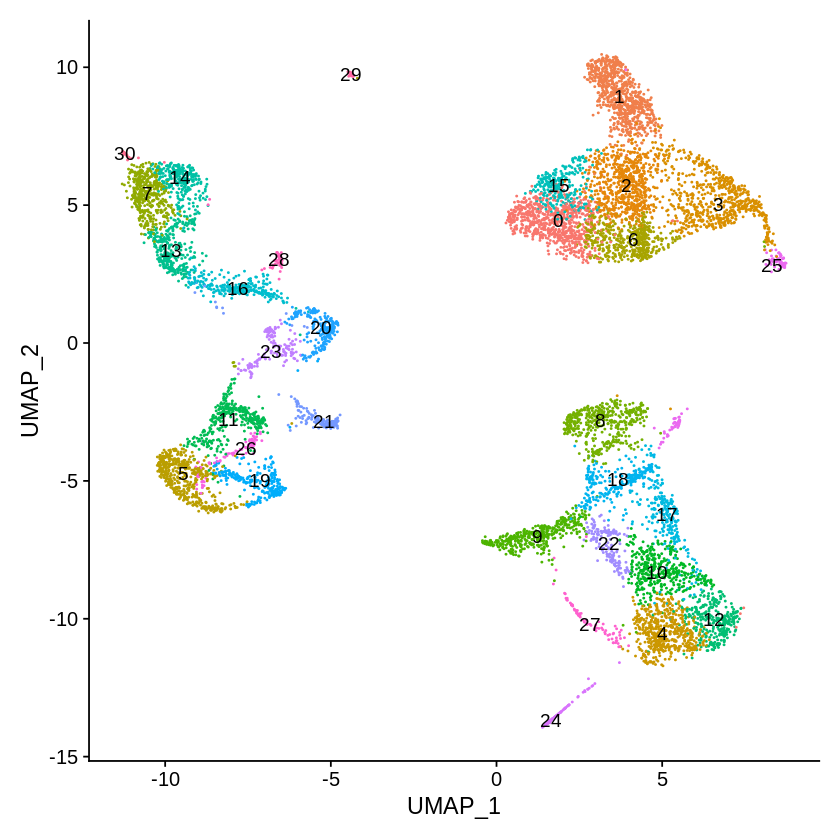

In [16]:
P28 = FindClusters(P28, resolution = 2.1)
DimPlot(P28, label=T)+NoLegend()

In [17]:
cmb = RunUMAP(
    FindNeighbors(
    RunPCA(
    ScaleData(
    FindVariableFeatures(
    NormalizeData(cmb,verbose = F),verbose = F),
        verbose = F),
        npcs = 50, verbose = F),
        verbose = F),
    reduction = "pca", dims = 1:50, verbose = F)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


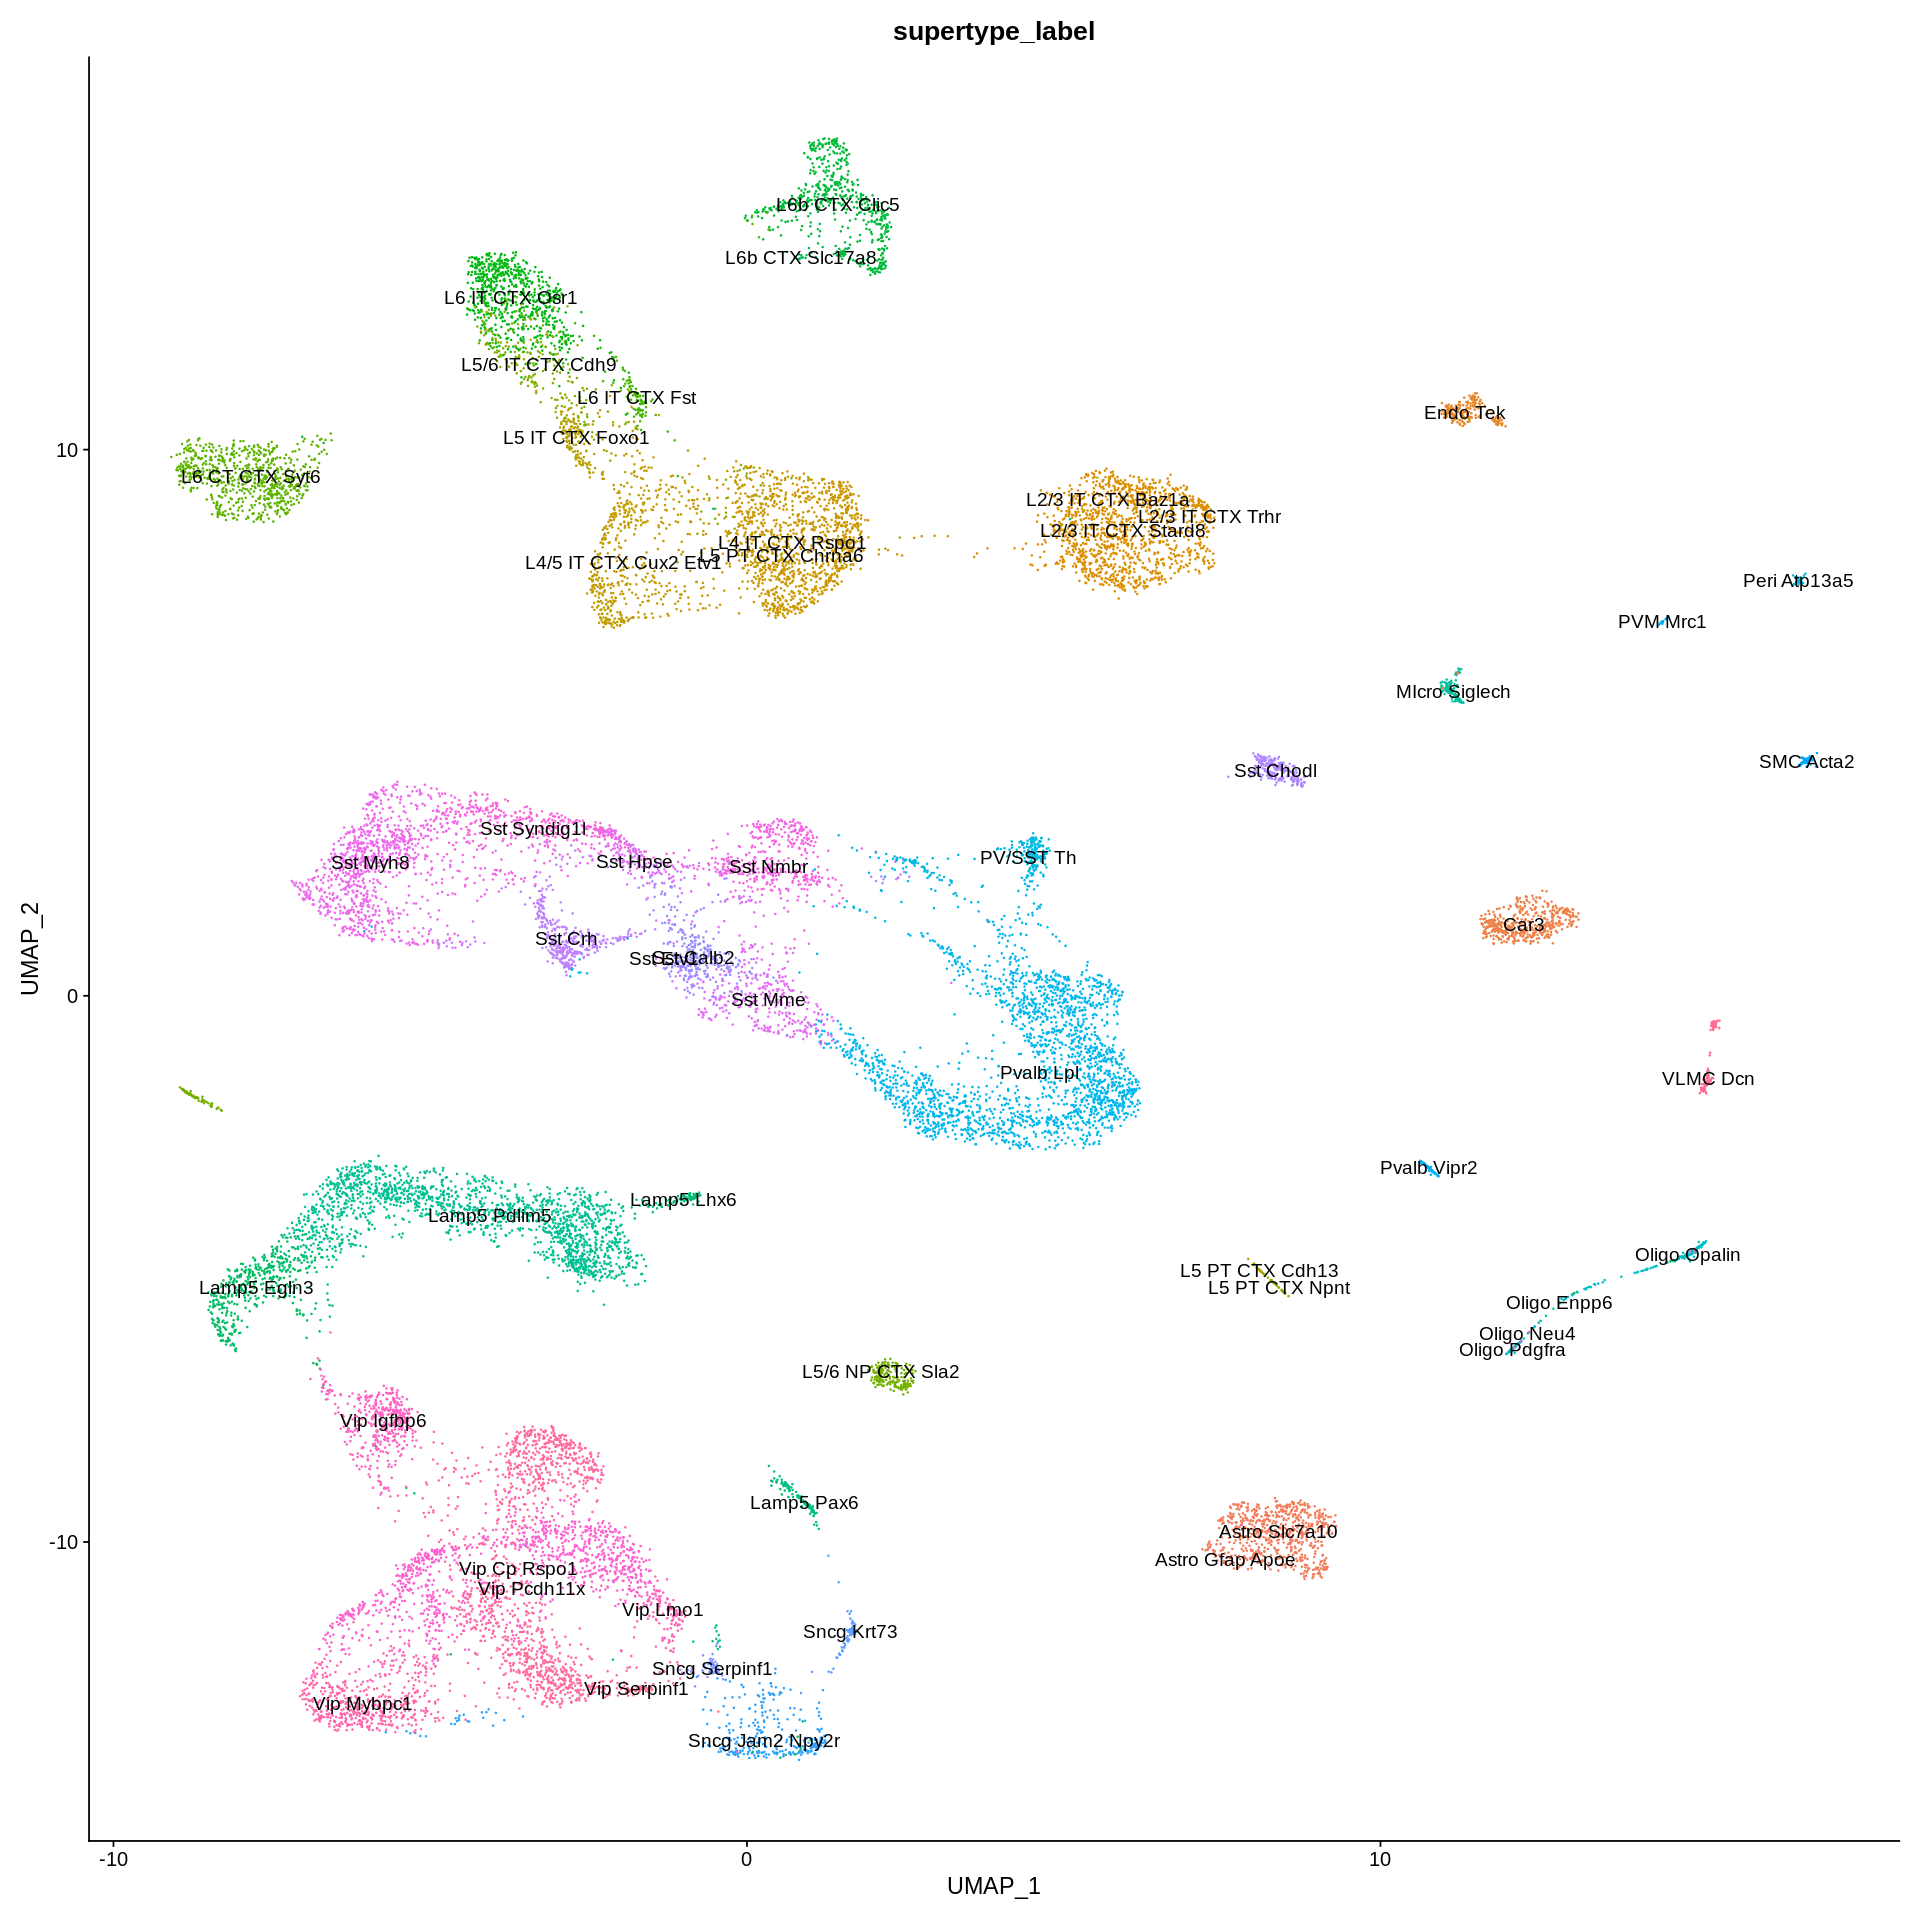

In [247]:
options(repr.plot.width = 16, repr.plot.height = 16)
DimPlot(cmb, group.by='supertype_label', label=T)+NoLegend()
ggsave('./FIGURES/allen_IN_EXC_NN_umap.pdf', height = 16, width = 16)

In [248]:
table(subset(cmb@meta.data,class_label=='Glutamatergic' ,supertype_label))


                 Car3     L2/3 IT CTX Baz1a    L2/3 IT CTX Stard8 
                  430                    19                  1197 
     L2/3 IT CTX Trhr       L4 IT CTX Rspo1 L4/5 IT CTX Cux2 Etv1 
                    4                  1267                   485 
      L5 IT CTX Foxo1       L5 PT CTX Cdh13      L5 PT CTX Chrna6 
                  162                    26                     2 
       L5 PT CTX Npnt      L5/6 IT CTX Cdh9      L5/6 NP CTX Sla2 
                   37                   251                   258 
       L6 CT CTX Syt6         L6 IT CTX Fst        L6 IT CTX Osr1 
                  728                   100                   673 
        L6b CTX Clic5       L6b CTX Slc17a8 
                  584                    18 

An object of class Seurat 
42055 features across 12220 samples within 1 assay 
Active assay: RNA (42055 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

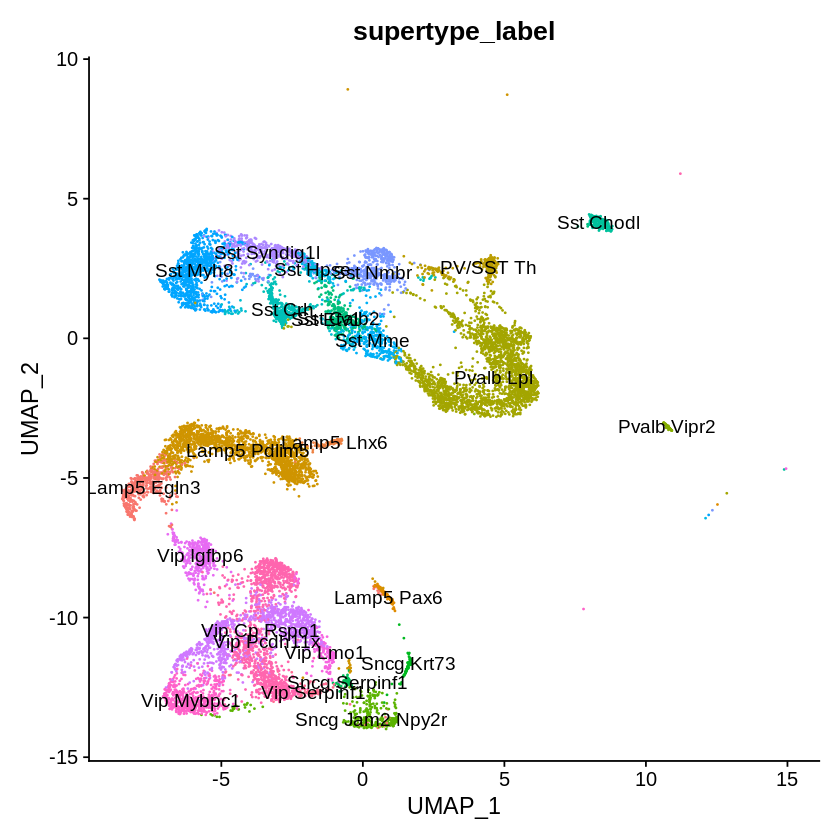

In [19]:
smrt_in=subset(cmb,class_label=='GABAergic')
RunUMAP(
    FindNeighbors(
    RunPCA(
    ScaleData(
    FindVariableFeatures(smrt_in,verbose = F),
        verbose = F),
        npcs = 50, verbose = F),
        verbose = F),
    reduction = "pca", dims = 1:50, verbose = F)
DimPlot(smrt_in, group.by='supertype_label', label=T)+NoLegend()

In [20]:
anchors = FindIntegrationAnchors(list(P28=P28,smrt_in = smrt_in), dims = 1:100,verbose = F)
integrated = IntegrateData(anchorset = anchors, dims = 1:100,verbose = F)
DefaultAssay(integrated) = "integrated"
integrated = ScaleData(integrated, verbose = FALSE)
integrated = RunPCA(integrated, npcs = 50, verbose = FALSE)
integrated = ProjectDim(integrated, verbose = F)
integrated = FindNeighbors(integrated,verbose = F)
integrated = FindClusters(integrated,resolution=2,random.seed=42, verbose = F)
integrated = RunUMAP(integrated, reduction = "pca", dims = 1:50, verbose = F)

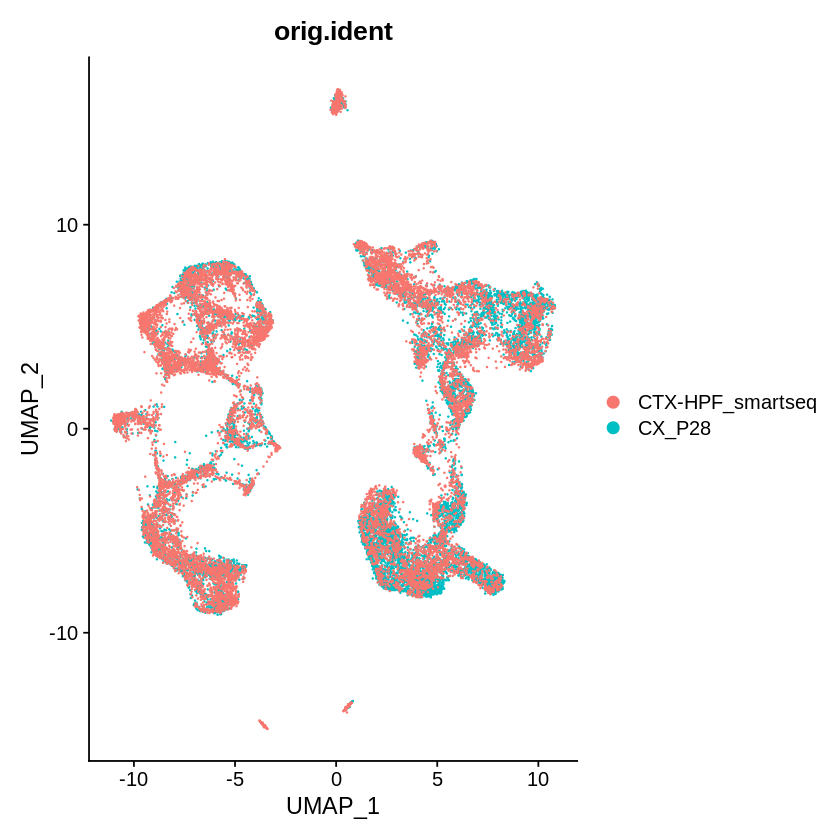

In [21]:
DimPlot(integrated, group.by='orig.ident')

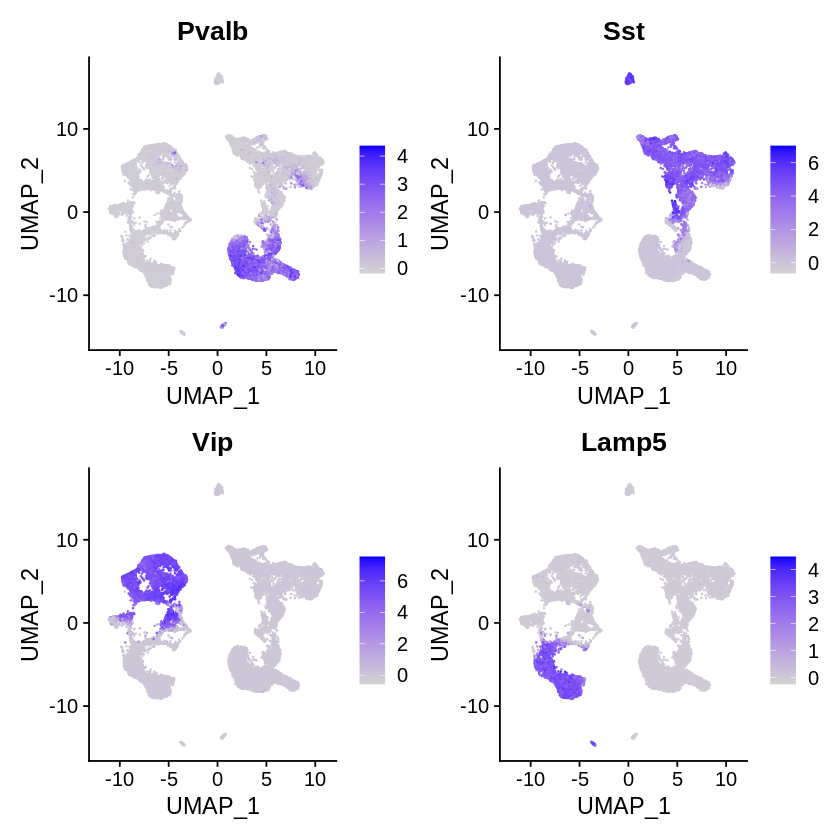

In [22]:
FeaturePlot(integrated,c('Pvalb','Sst','Vip','Lamp5'))

In [23]:
integrated = FindClusters(integrated,resolution=1.7,random.seed=42, verbose = F)

In [ ]:
# integrated@meta.data$`RNA_snn_res.2.1` = "0"
# sub28 = rownames(subset(integrated@meta.data,orig.ident=='CX_P28'))
# subsmrt = rownames(subset(integrated@meta.data,orig.ident!='CX_P28'))
# integrated@meta.data[sub28,'sherry_clusters'] = P28@meta.data[sub28,'RNA_snn_res.2.1']
# integrated@meta.data[subsmrt,'sherry_clusters'] = integrated@meta.data[subsmrt,'supertype_label']

In [24]:
my_levs = c('PV/SST Th','Pvalb Lpl','Pvalb Vipr2',
'Sst Calb2','Sst Chodl','Sst Crh','Sst Etv1','Sst Hpse','Sst Mme','Sst Myh8','Sst Nmbr','Sst Syndig1l',
'Vip Cp Rspo1','Vip Igfbp6','Vip Lmo1','Vip Mybpc1','Vip Pcdh11x','Vip Serpinf1',
'Lamp5 Egln3','Lamp5 Lhx6','Lamp5 Pax6','Lamp5 Pdlim5',
'Sncg Jam2 Npy2r','Sncg Krt73','Sncg Serpinf1')



# card_cl = reshape2::melt(table(integrated@meta.data$supertype_label,integrated@meta.data$integrated_snn_res.1.7))
# colnames(card_cl) = c('supertype','cca','cells')
# card_cl$supertype = factor(card_cl$supertype, levels=my_levs)
# card_cl = subset(card_cl, cells>0)
# options(repr.plot.width = 10, repr.plot.height = 10)
# ggplot(card_cl, aes(x=supertype, y=cells, fill=supertype)) + 
# geom_col(position = 'dodge',width=.9) + facet_wrap(~cca,nrow = 8,drop = T) + 
# theme(axis.text.x=element_text(angle=90,hjust=1)) + NoLegend()
# options(repr.plot.width = 10, repr.plot.height = 20)
# ggplot(card_cl, aes(x=supertype, y=cells, fill=supertype)) + 
# geom_col(position = 'dodge',width=.9) + facet_wrap(~cca,nrow = 8,drop = T,scales = 'free') + 
# theme(axis.text.x=element_text(angle=90,hjust=1)) + NoLegend()

In [524]:
# sherry_cl = reshape2::melt(table(integrated@meta.data$RNA_snn_res.2.1,integrated@meta.data$integrated_snn_res.1.7))
# colnames(sherry_cl) = c('sh_cl','cca','cells')
# sherry_cl$sh_cl = as.factor(sherry_cl$sh_cl)
# sherry_cl = subset(sherry_cl, cells>0)
# options(repr.plot.width = 10, repr.plot.height = 10)
# ggplot(sherry_cl, aes(x=sh_cl, y=cells, fill=sh_cl)) + 
# geom_col(position = 'dodge',width=.9) + facet_wrap(~cca,nrow = 8,drop = T) + 
# theme(axis.text.x=element_text(angle=90,hjust=1)) + NoLegend()
# options(repr.plot.width = 10, repr.plot.height = 20)
# ggplot(sherry_cl, aes(x=sh_cl, y=cells, fill=sh_cl)) + 
# geom_col(position = 'dodge',width=.9) + facet_wrap(~cca,nrow =8 ,drop = T,scales = 'free') + 
# theme(axis.text.x=element_text(angle=90,hjust=1)) + NoLegend()

In [25]:
# library(ggplot2)
sub28 = rownames(subset(integrated@meta.data,orig.ident=='CX_P28'))
subsmrt = rownames(subset(integrated@meta.data,orig.ident!='CX_P28'))
integrated@meta.data$sherry_clusters = "0"
integrated@meta.data[sub28,'sherry_clusters'] = integrated@meta.data[sub28,'RNA_snn_res.2.1']
integrated@meta.data[subsmrt,'sherry_clusters'] = integrated@meta.data[subsmrt,'supertype_label']

In [26]:
# table(integrated@meta.data$sherry_clusters)

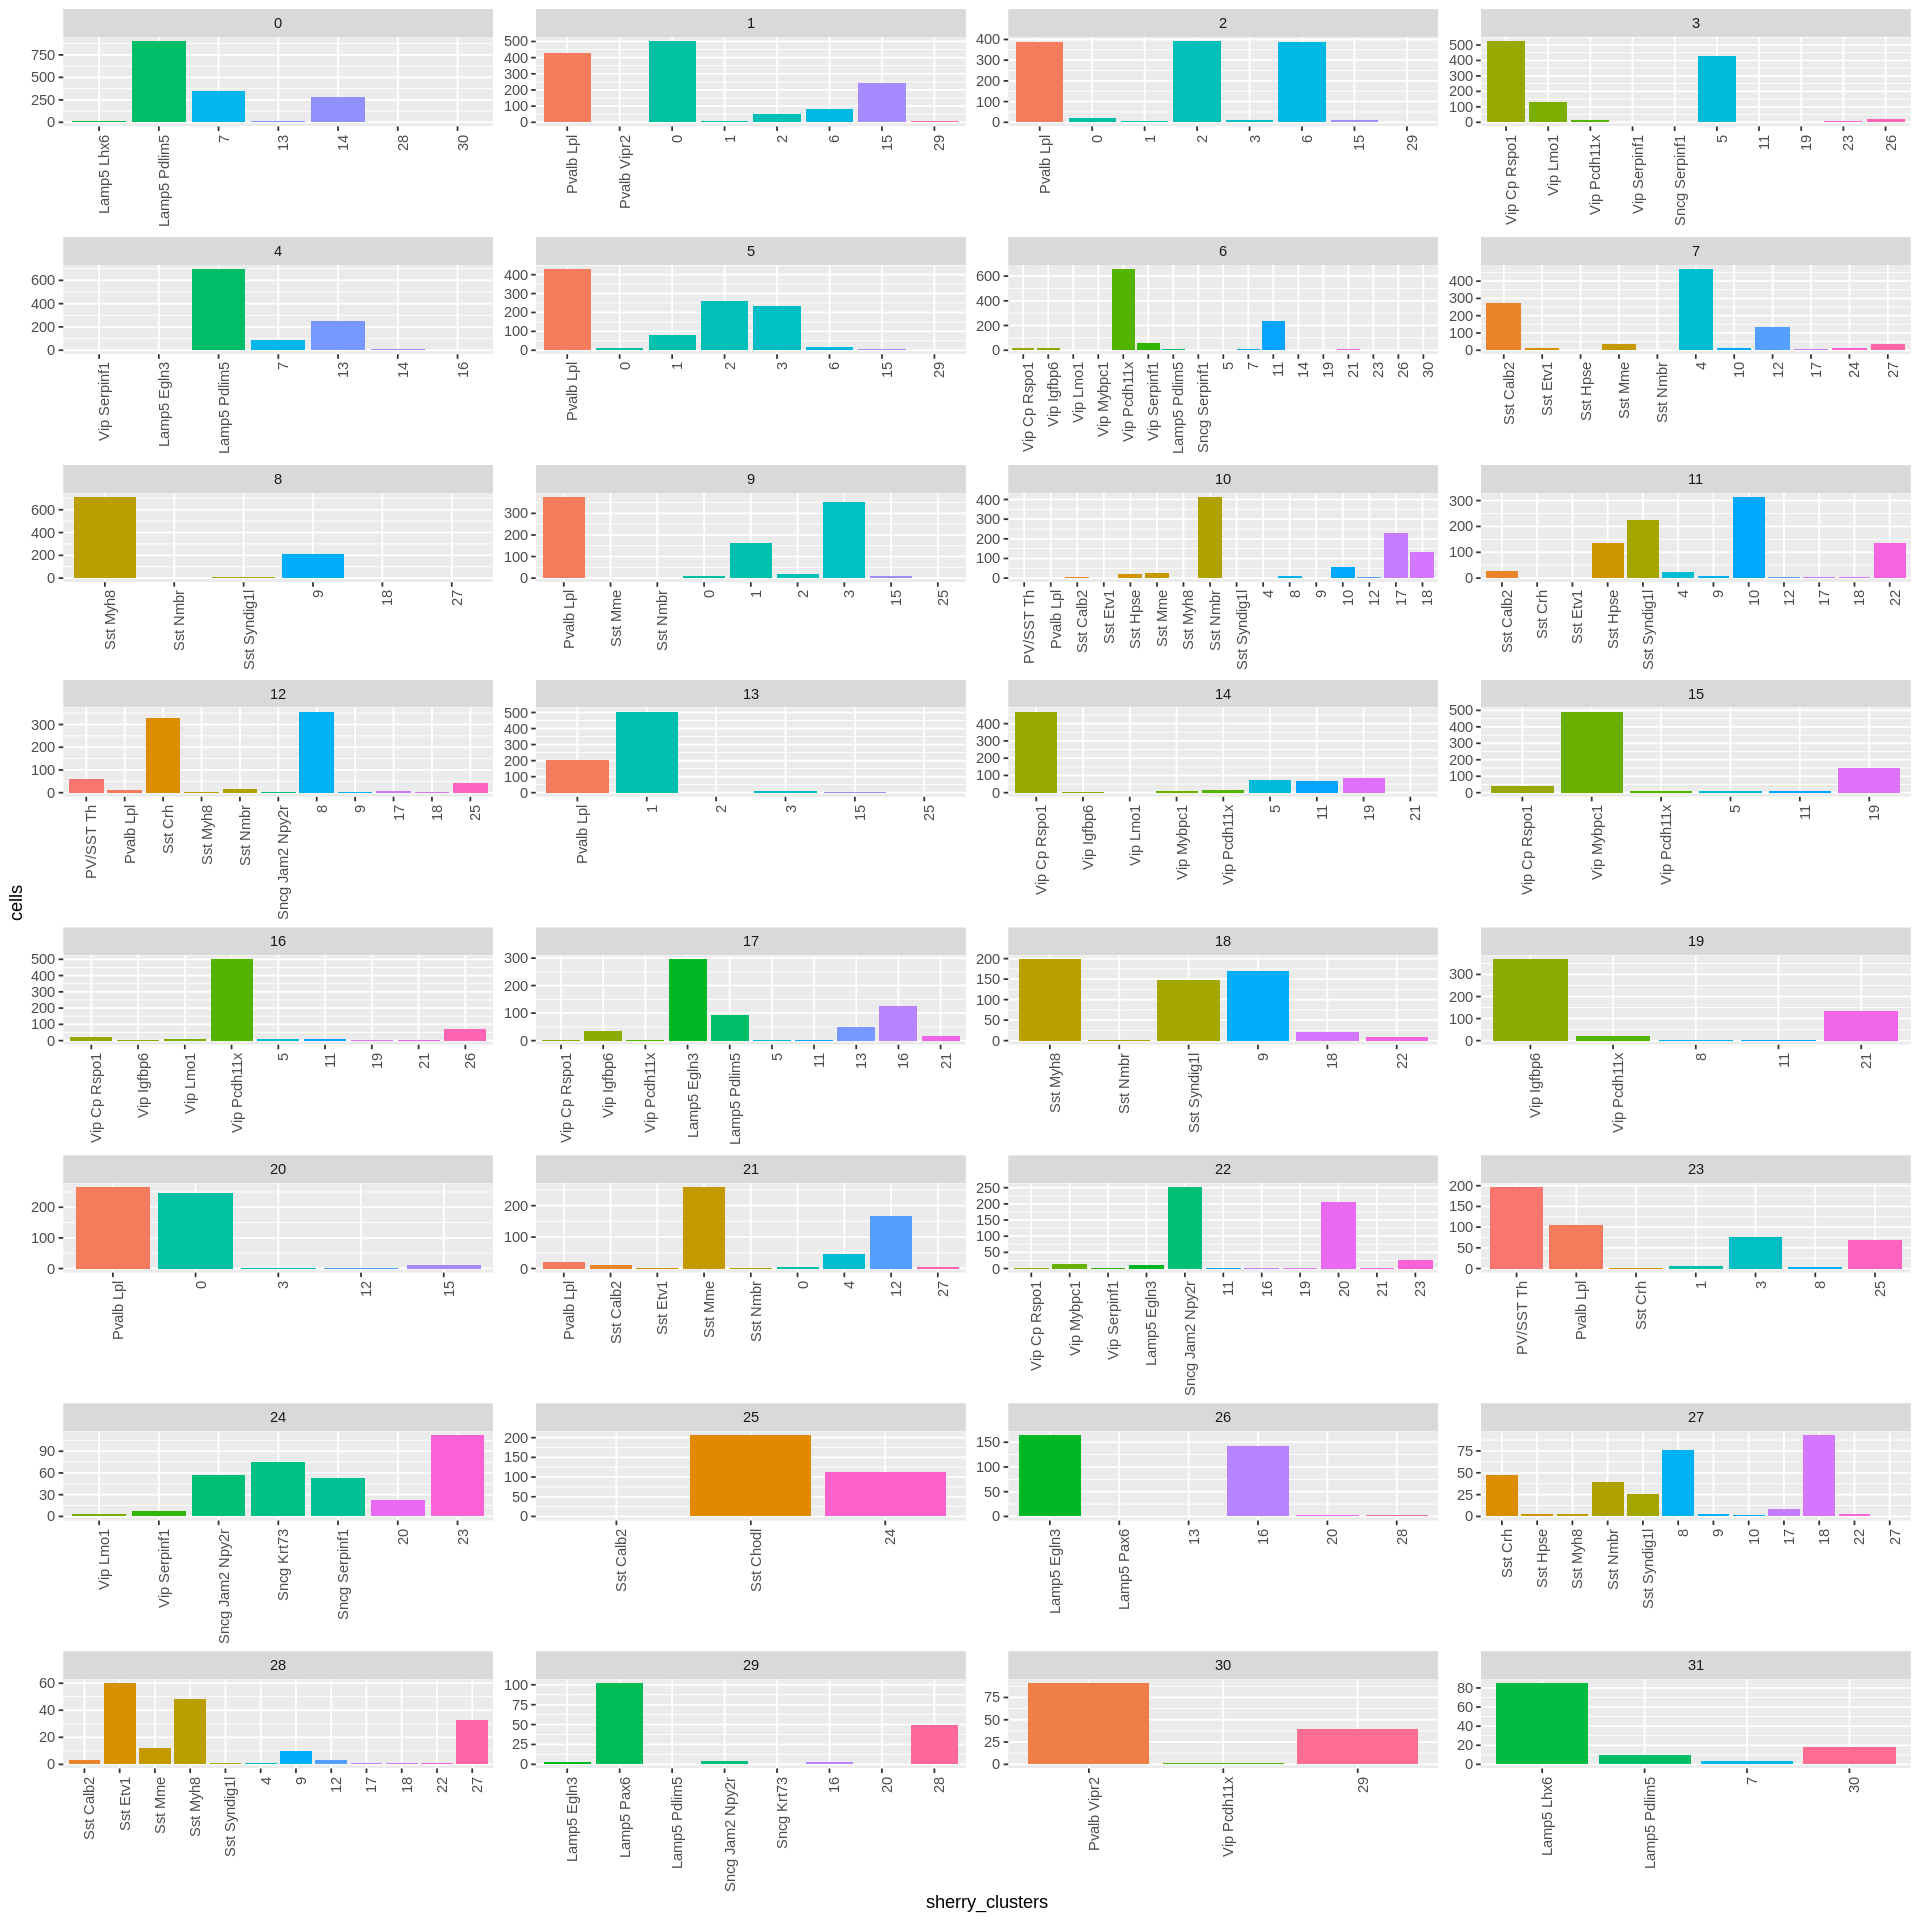

In [27]:
options(repr.plot.width = 16, repr.plot.height = 16)

tmp = reshape2::melt(t(table(integrated@meta.data$sherry_clusters, integrated@meta.data$seurat_clusters)))
colnames(tmp) = c('cca','sherry_clusters','cells')
tmp = subset(tmp, cells>0)
tmp$sherry_clusters = droplevels(tmp$sherry_clusters)
# tmp = tmp
tmp$sherry_clusters = factor(tmp$sherry_clusters, levels=c(my_levs,seq(0,31)))
# ggplot(tmp, aes(x=sherry_clusters, y=cells, fill=sherry_clusters)) + 
# geom_col(position = 'dodge',width=.9) + facet_wrap(~cca,nrow = 8,drop = T,scales = 'free_y') + 
# theme(axis.text.x=element_text(angle=90,hjust=1)) + NoLegend()
ggplot(tmp, aes(x=sherry_clusters, y=cells, fill=sherry_clusters)) + 
geom_col(position = 'dodge',width=.9) + facet_wrap(~cca,nrow = 8,drop = T,scales = 'free') + 
theme(axis.text.x=element_text(angle=90,hjust=1)) + NoLegend()

Warning message:
“Removed 9701 rows containing missing values (geom_point).”
Warning message:
“Removed 14 rows containing missing values (geom_text).”
Warning message:
“Removed 9701 rows containing missing values (geom_point).”
Warning message:
“Removed 14 rows containing missing values (geom_text).”
Warning message:
“Removed 9701 rows containing missing values (geom_point).”
Warning message:
“Removed 15 rows containing missing values (geom_text).”


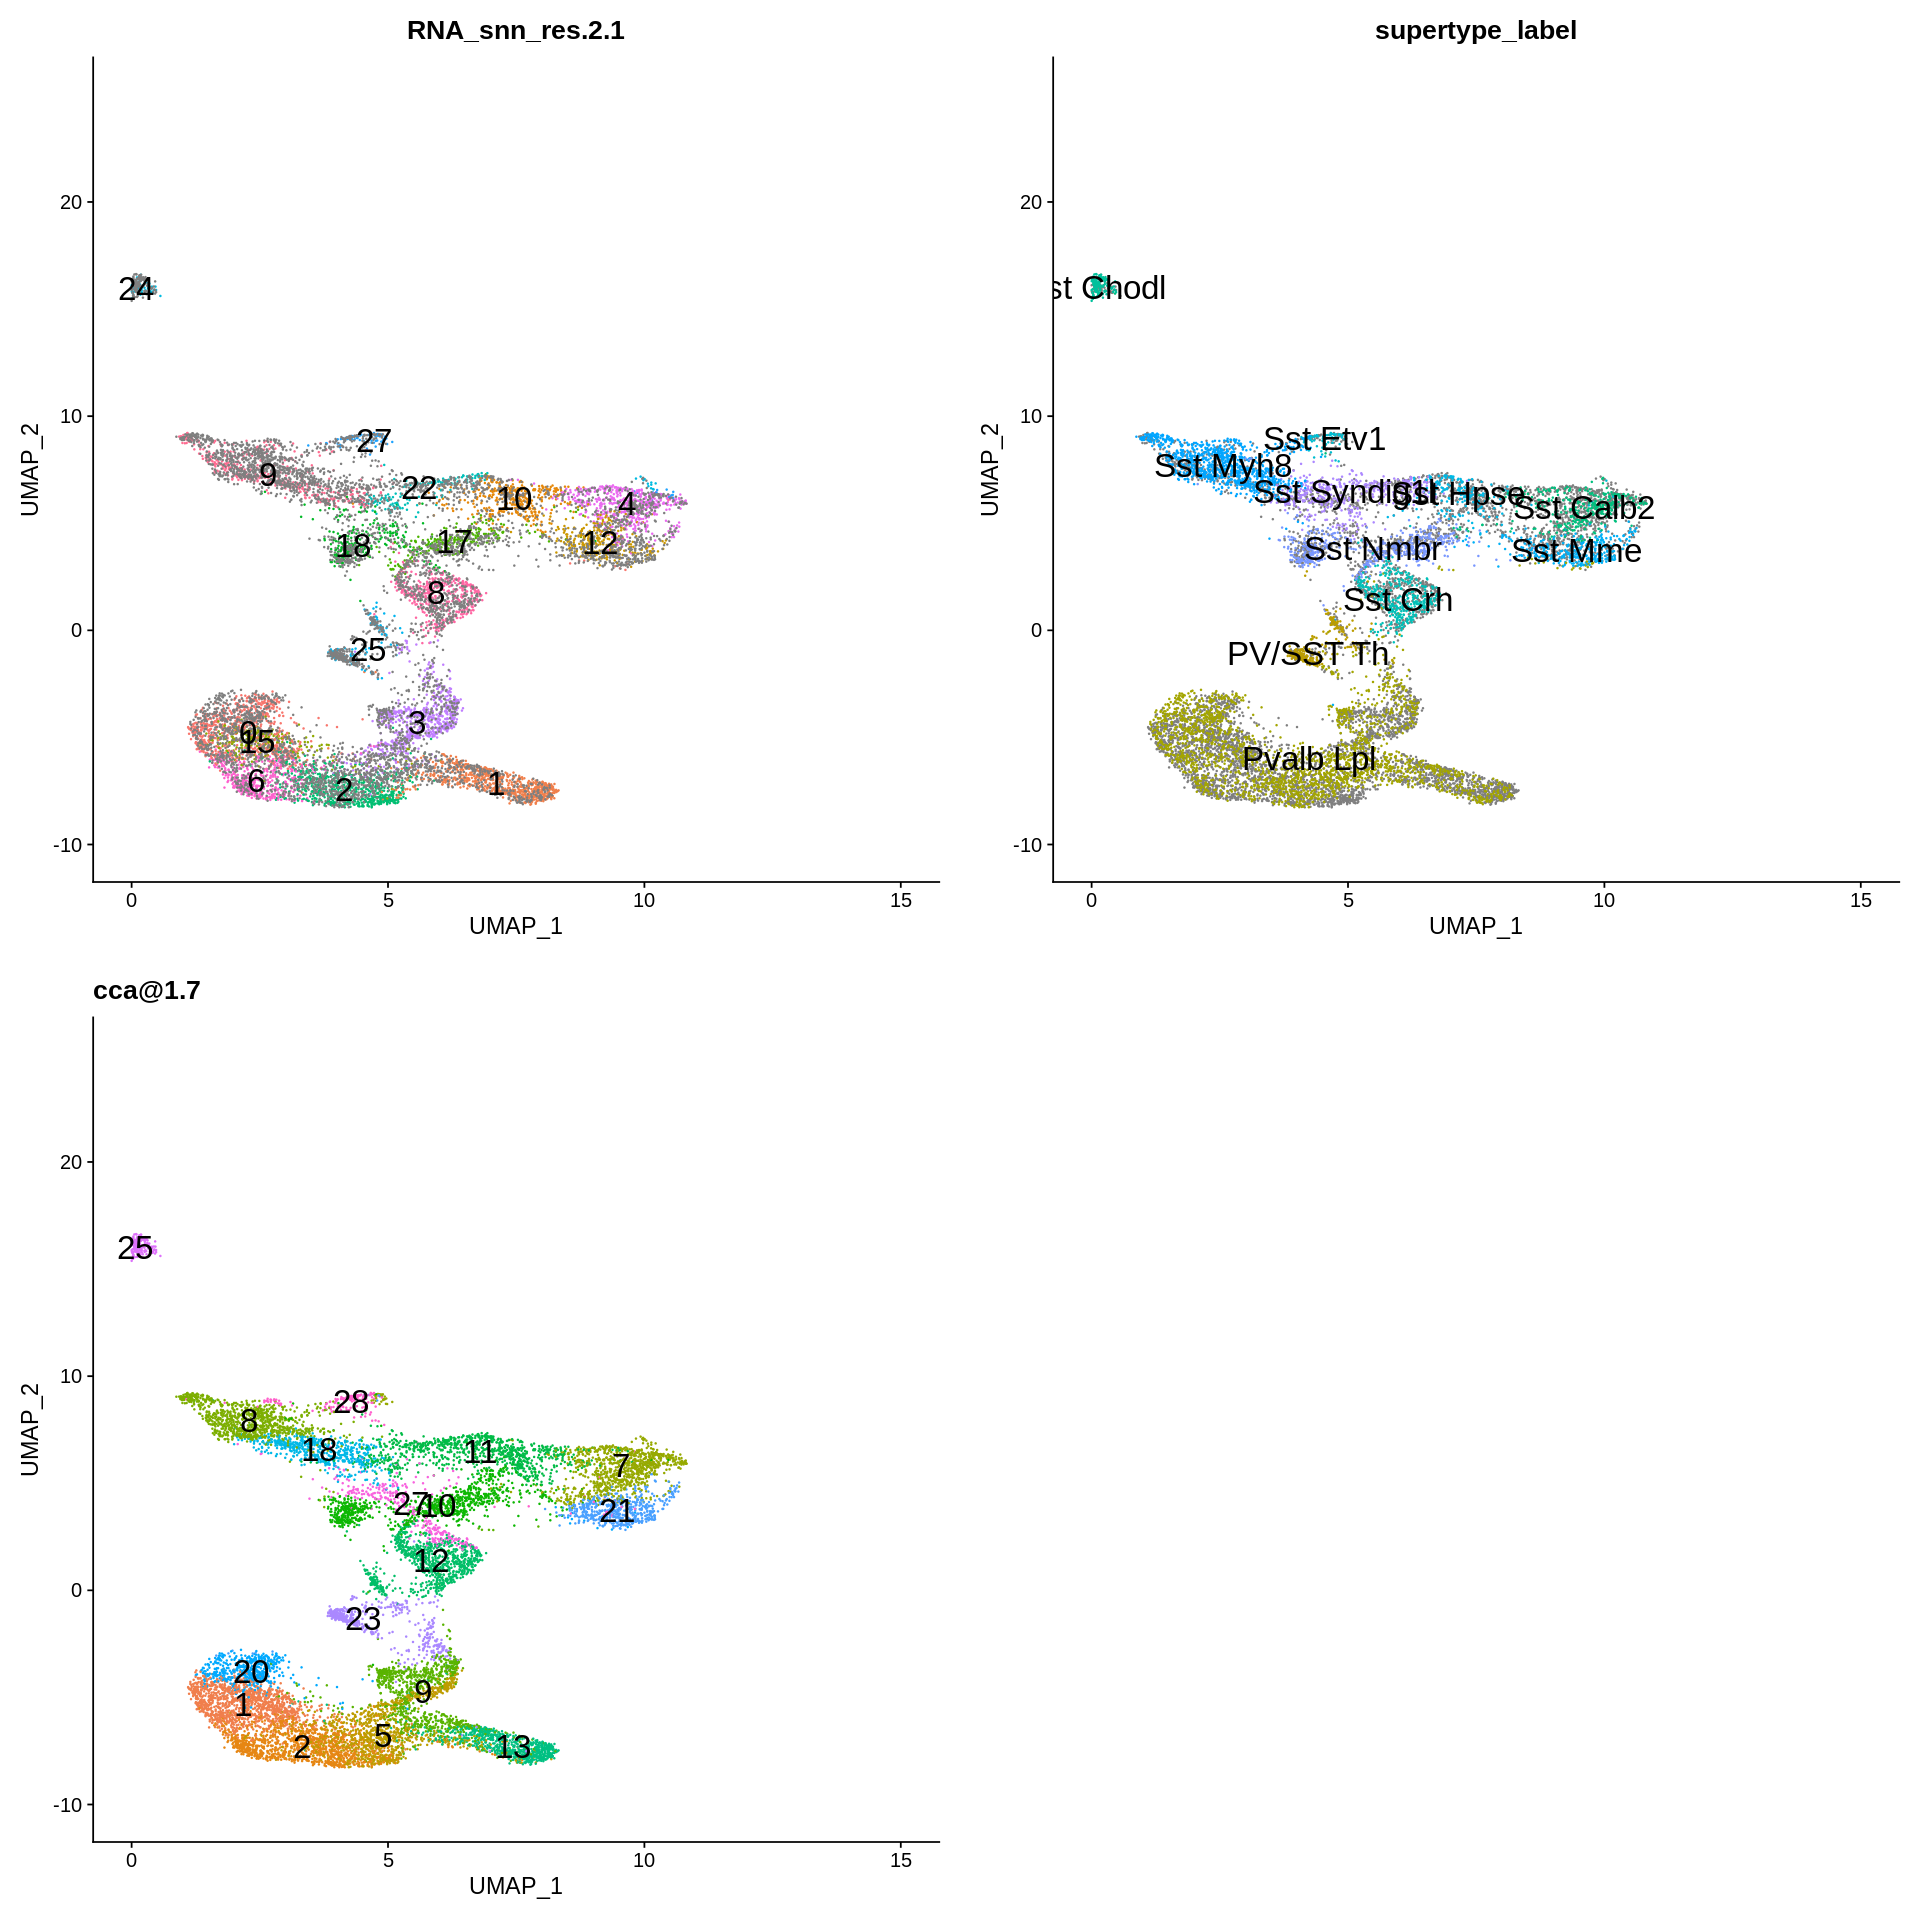

In [42]:
options(repr.plot.width = 16, repr.plot.height = 16)
plot_grid(
DimPlot(integrated, group.by='RNA_snn_res.2.1', label = T,label.size = 7) + NoLegend()+xlim(0,15)+ylim(-10,25),
DimPlot(integrated, group.by='supertype_label', label = T,label.size = 7) + NoLegend()+xlim(0,15)+ylim(-10,25),
DimPlot(integrated, label = T,label.size = 7) + NoLegend()+xlim(0,15)+ylim(-10,25)+ggtitle('cca@1.7'))

In [32]:
# P28_sst = ScaleData(P28_sst,verbose = F)
# P28_sst_a = AverageExpression(P28_sst,return.seurat = T, verbose = F)
sst_marks = c('Snap25','Gad1','Pvalb','Sst','Vip','Mme', 'Tac1', 'Calb2', 'Hpse', 'Cbln4', 'Etv1',
              'Myh8', 'Chrna2', 'Syndig1l', 'Pdyn', 'Npy', 'Crh', 'Nmbr', 'Esm1', 'Crhr2', 'Chodl')
sst_marks_b = c('Nos1','Tac1','Calb2','Etv1','Chrna2','Pdyn', 'Hpse', 'Crhr2', 'Crh')

In [33]:
k2c = melt(table(integrated@meta.data$`RNA_snn_res.2.1`,integrated@meta.data$`integrated_snn_res.1.7`))
a2c = melt(table(integrated@meta.data$supertype_label,integrated@meta.data$`integrated_snn_res.1.7`))
colnames(k2c) = c('p28','cca','cells_p')
colnames(a2c) = c('supertype','cca','cells_a')
k2c$cells_a = 0
k2c$supertype = 0
a2c$p28 = 0
a2c$cells_p = 0
k2c = subset(k2c,cells_p>0)
a2c = subset(a2c,cells_a>0)
ka2c = rbind(k2c,a2c)
ka2c$cells = ka2c$cells_p+ka2c$cells_a
ka2c[rownames(subset(ka2c,cells_p>0)),'supertype'] = ka2c[rownames(subset(ka2c,cells_p>0)),'p28']

In [168]:
cca_sel_cl = unique(ka2c[grepl("sst|CHODL",ka2c$supertype,ignore.case = T),]$cca)

[1]  7  8  9 10 11 12 18 21 23 25 27 28

In [173]:
cca_sst_sub = subset(ka2c,cca %in% cca_sel_cl)
tmp_a = lapply(cca_sel_cl,function(x){
    tmp = subset(cca_sst_sub,cca==x)
    tmp$p = tmp$cells_p / sum(tmp$cells_p)
    return(c(x,subset(tmp,p>=.2)$p28))
})
# tmp_a

tmp_b = lapply(cca_sel_cl,function(x){
    tmp = subset(cca_sst_sub,cca==x)
    tmp$p = tmp$cells_a / sum(tmp$cells_a)
    return(c(x,subset(tmp,p>=.3)$supertype))
})


cca_sel_cl = intersect(cca_sel_cl,unique(sapply(tmp_b,function(x){if(grepl('sst',x[2],ignore.case = T)){return(x[1])} else{return(-1)}})))
# cca_sel_cl = setdiff(cca_sel_cl,c('9'))

tmp_a = setdiff(unique(sapply(tmp_a, function(x){ if(!is.na(x[2])){return(x[2])} else{return(-1)}})),-1)
tmp_a = c(tmp_a,22)


[1] "4"  "9"  "17" "10" "8"  "12" "25" "24" "18" "27" "22"

[1] "7"  "8"  "10" "11" "12" "18" "21" "23" "25" "27" "28"

In [174]:
cca_sst_sub = subset(integrated,seurat_clusters %in% cca_sel_cl)

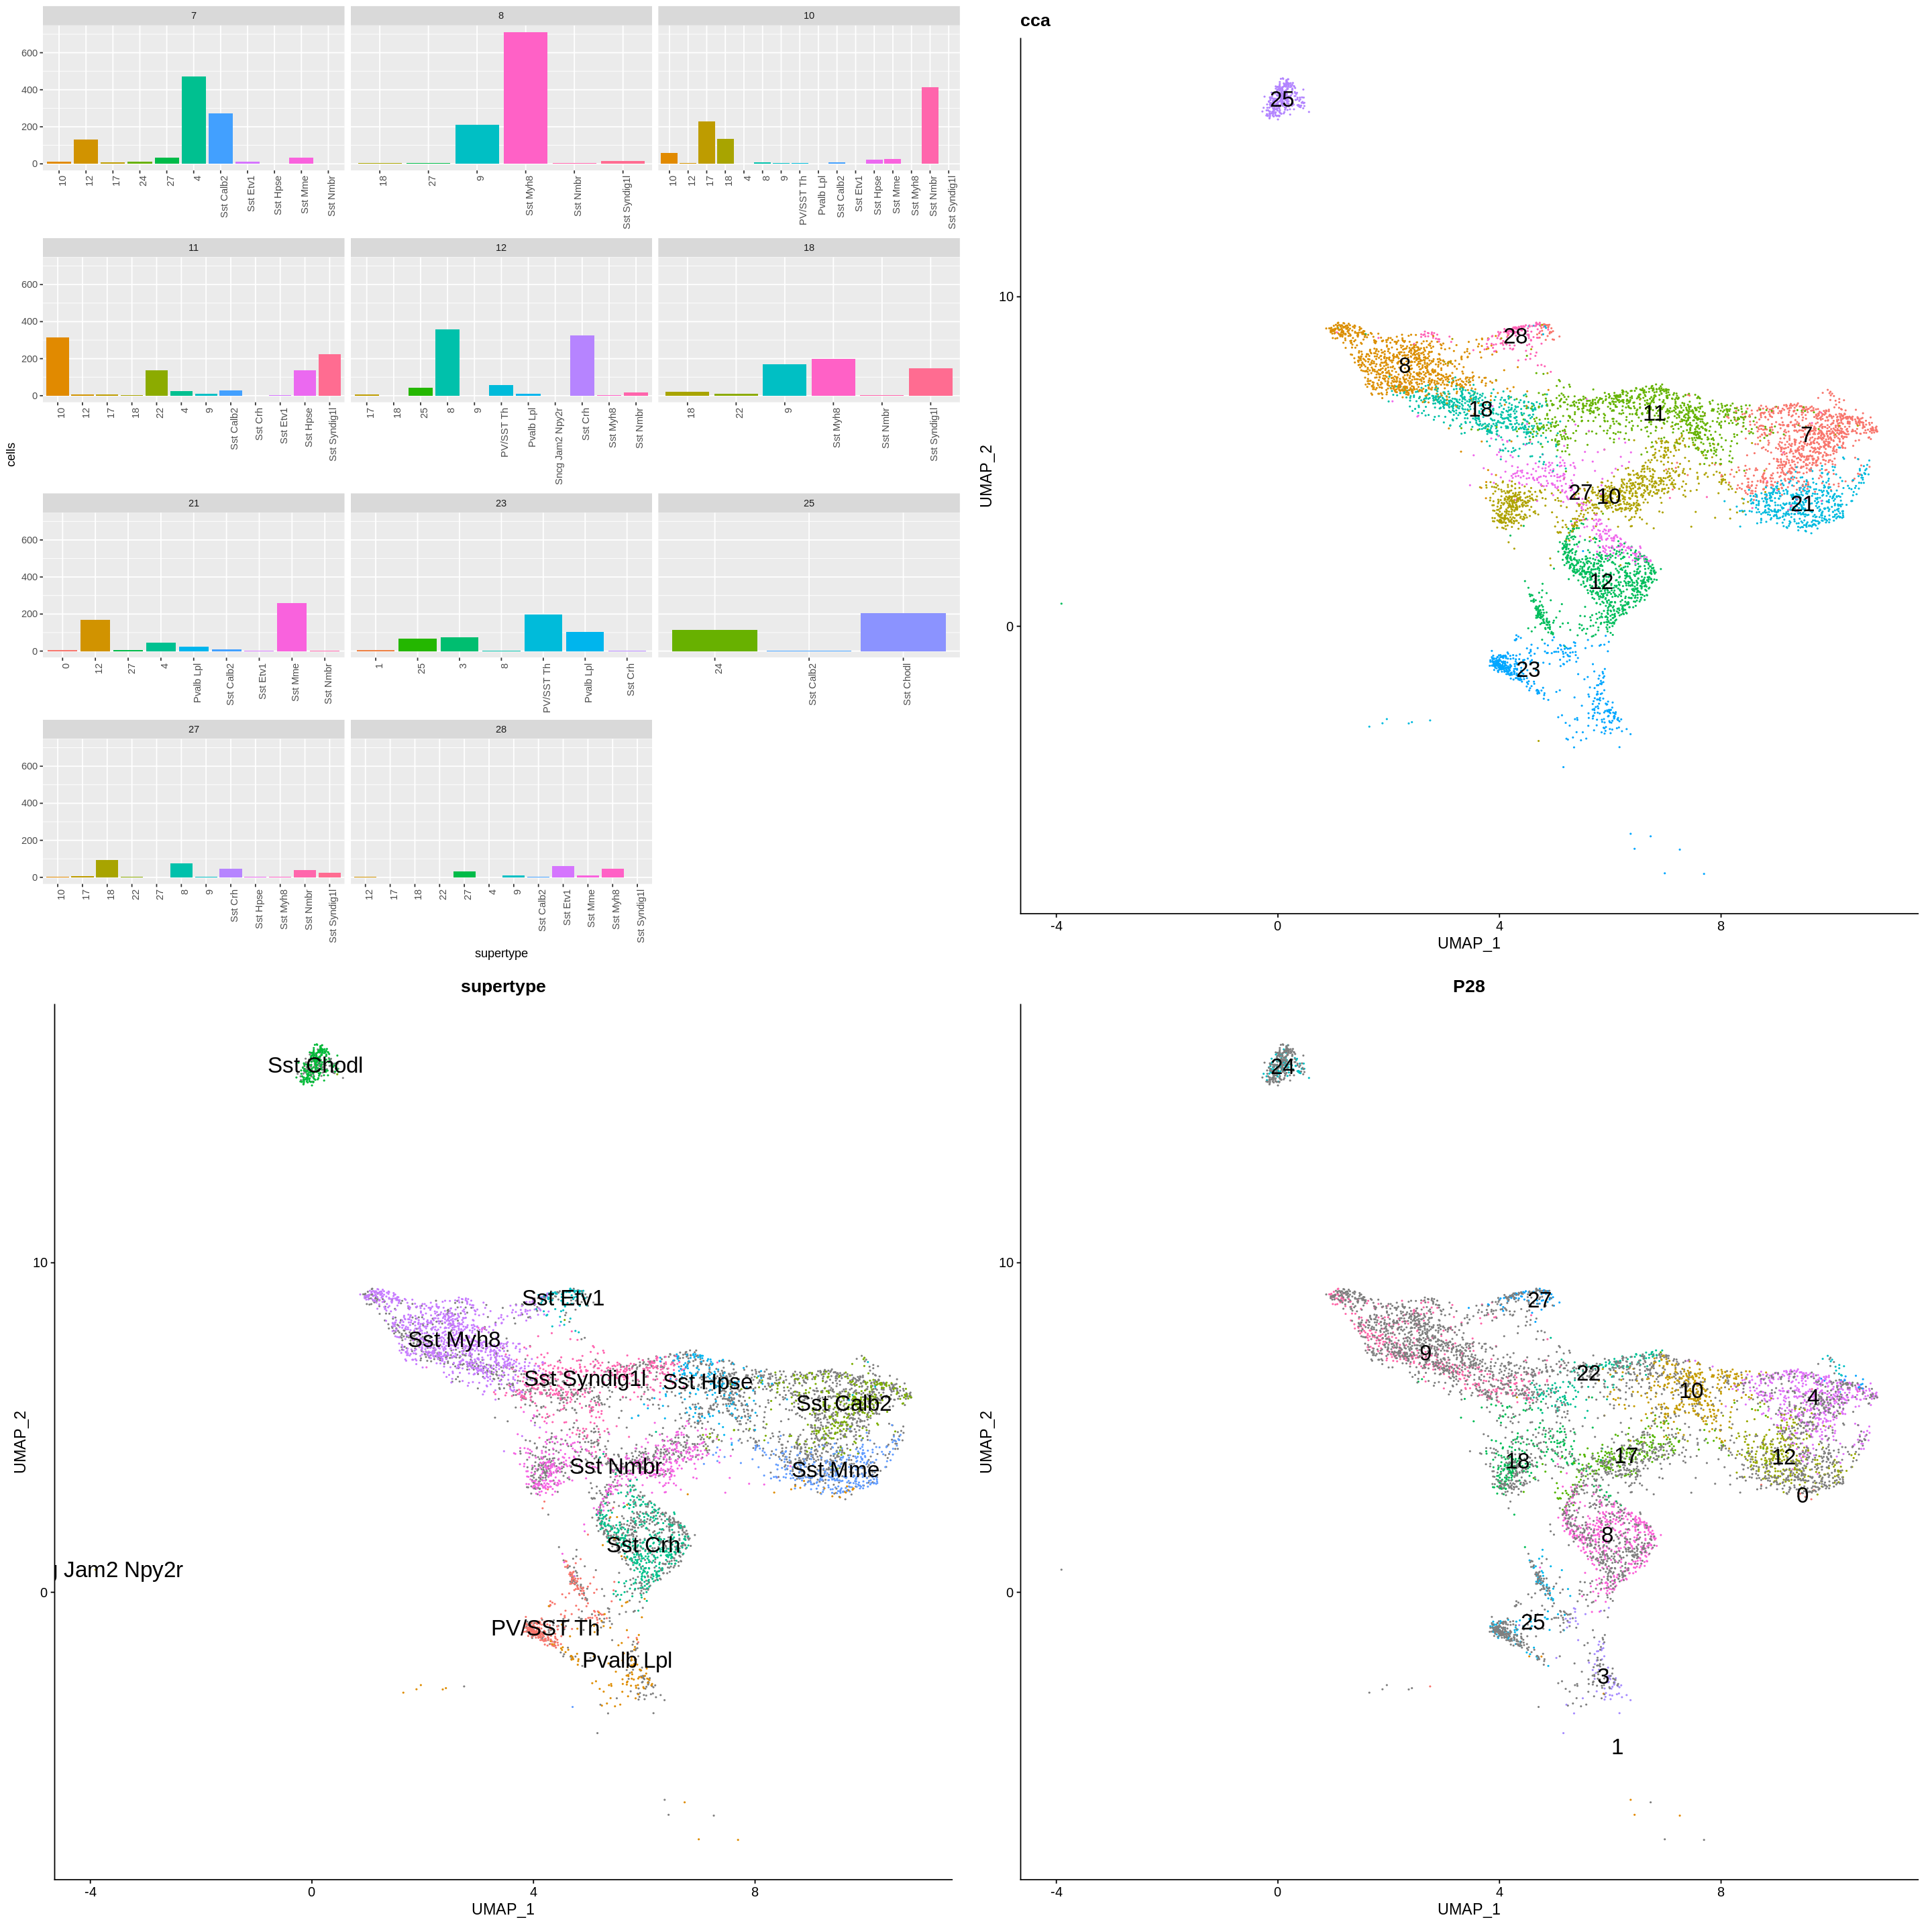

In [243]:
options(repr.plot.width = 24, repr.plot.height = 24)
plot_grid(
ggplot(subset(ka2c,cca %in% cca_sel_cl),aes(x=supertype, y=cells, fill=supertype)) + 
geom_col(position = 'dodge') +facet_wrap(~cca,nrow=4,scales = 'free_x',drop=T) + 
theme(axis.text.x=element_text(angle=90,hjust=1))+NoLegend() ,
    DimPlot(cca_sst_sub, label=T,label.size = 7)+NoLegend()+ggtitle('cca'),
    DimPlot(cca_sst_sub, group.by='supertype_label',label=T,label.size = 7)+NoLegend()+ggtitle('supertype'),
    DimPlot(cca_sst_sub, group.by='RNA_snn_res.2.1',label=T,label.size = 7)+NoLegend()+ggtitle('P28')
   
)
ggsave('cca_umaps_and_barplot.pdf',height = 24, width = 24)

In [177]:
P28_sst = subset(P28,`RNA_snn_res.2.1` %in% tmp_a)

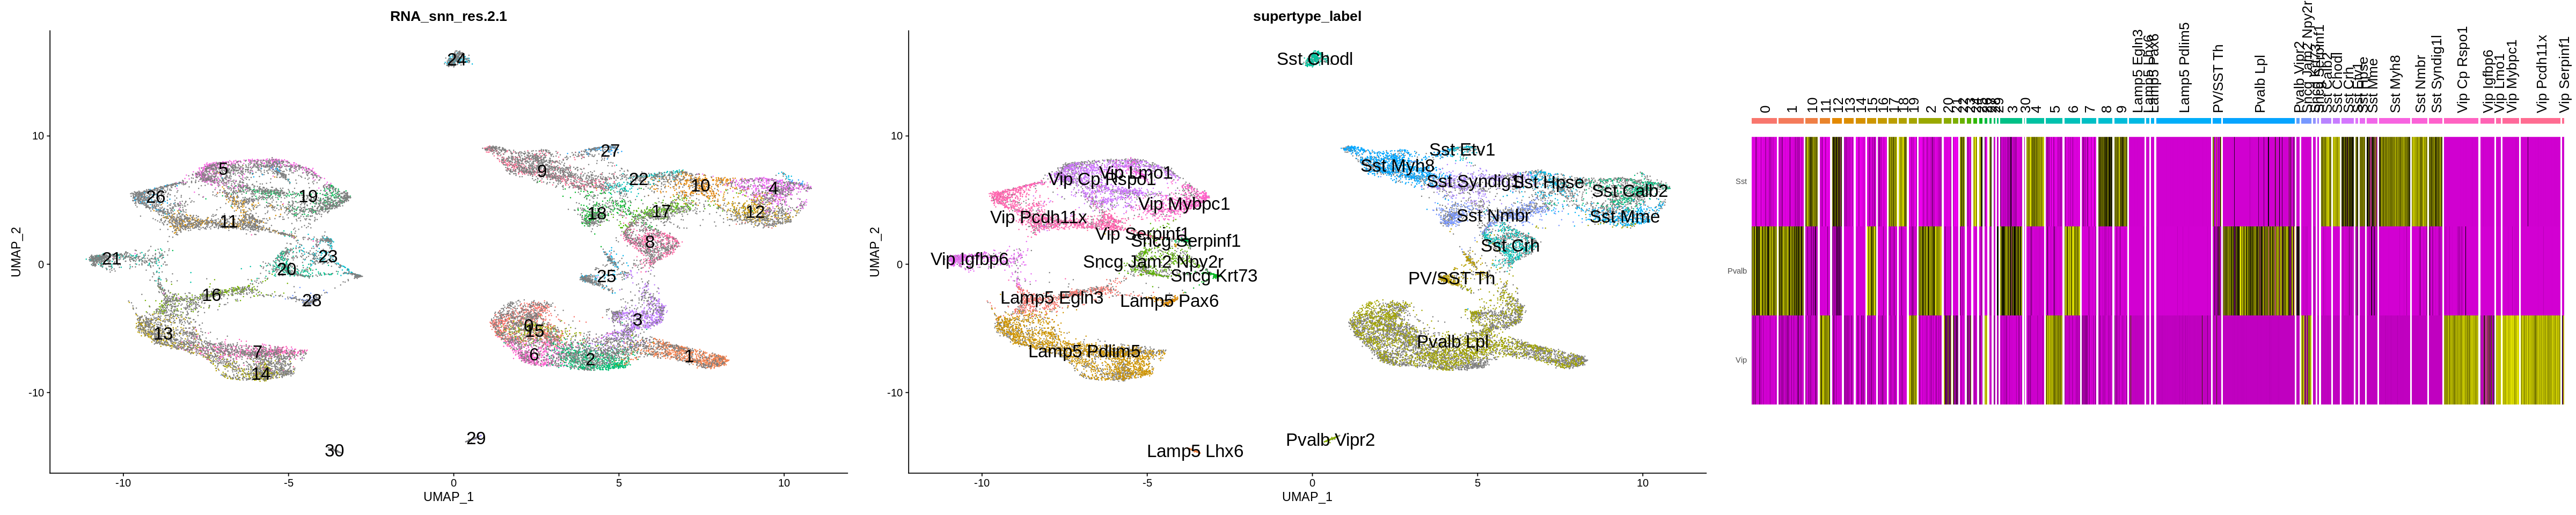

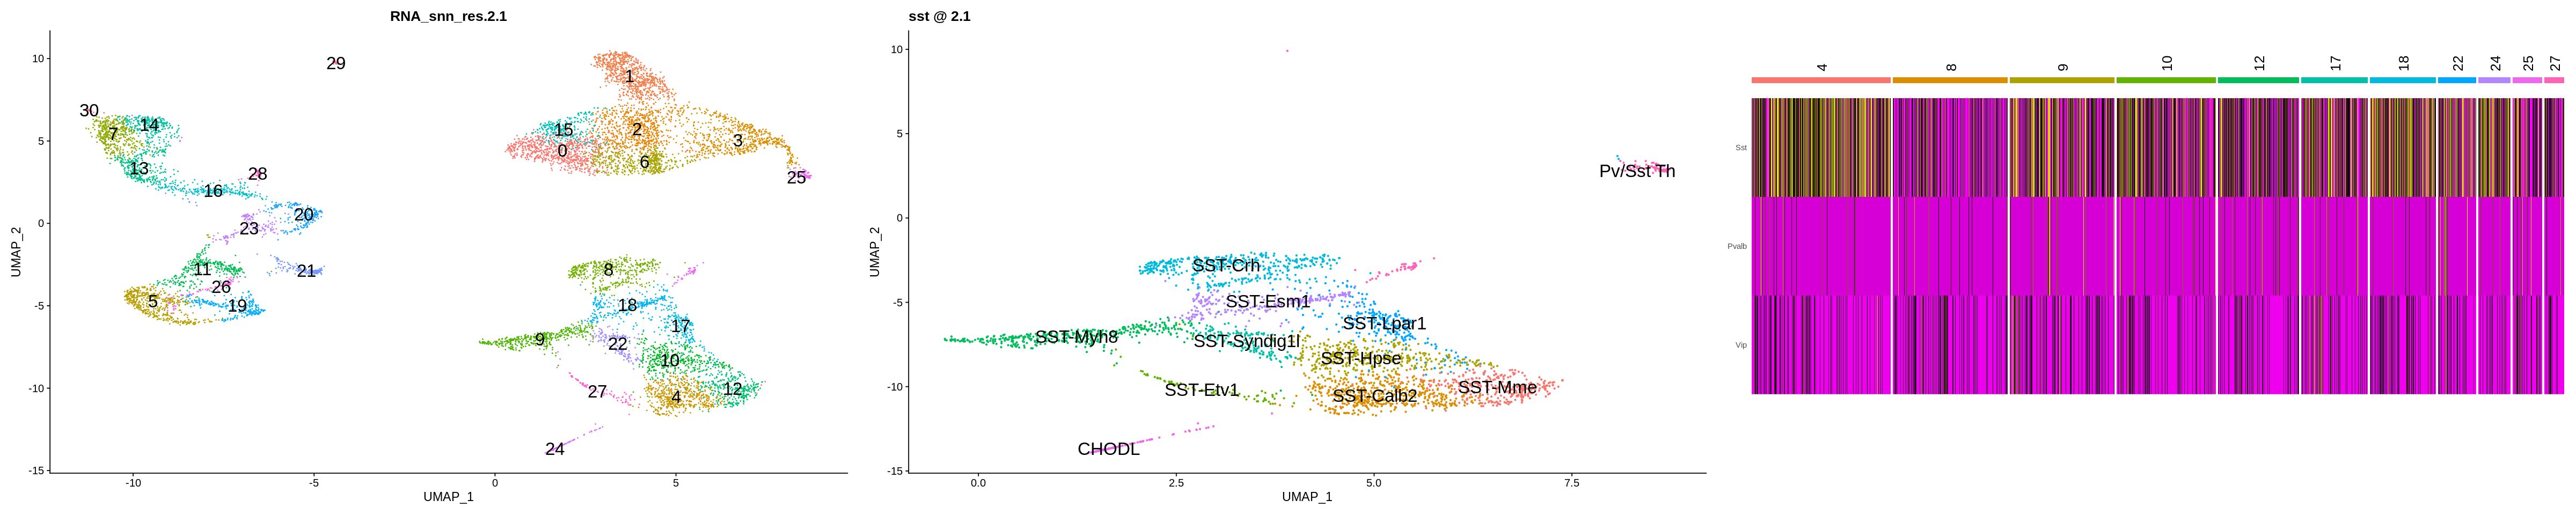

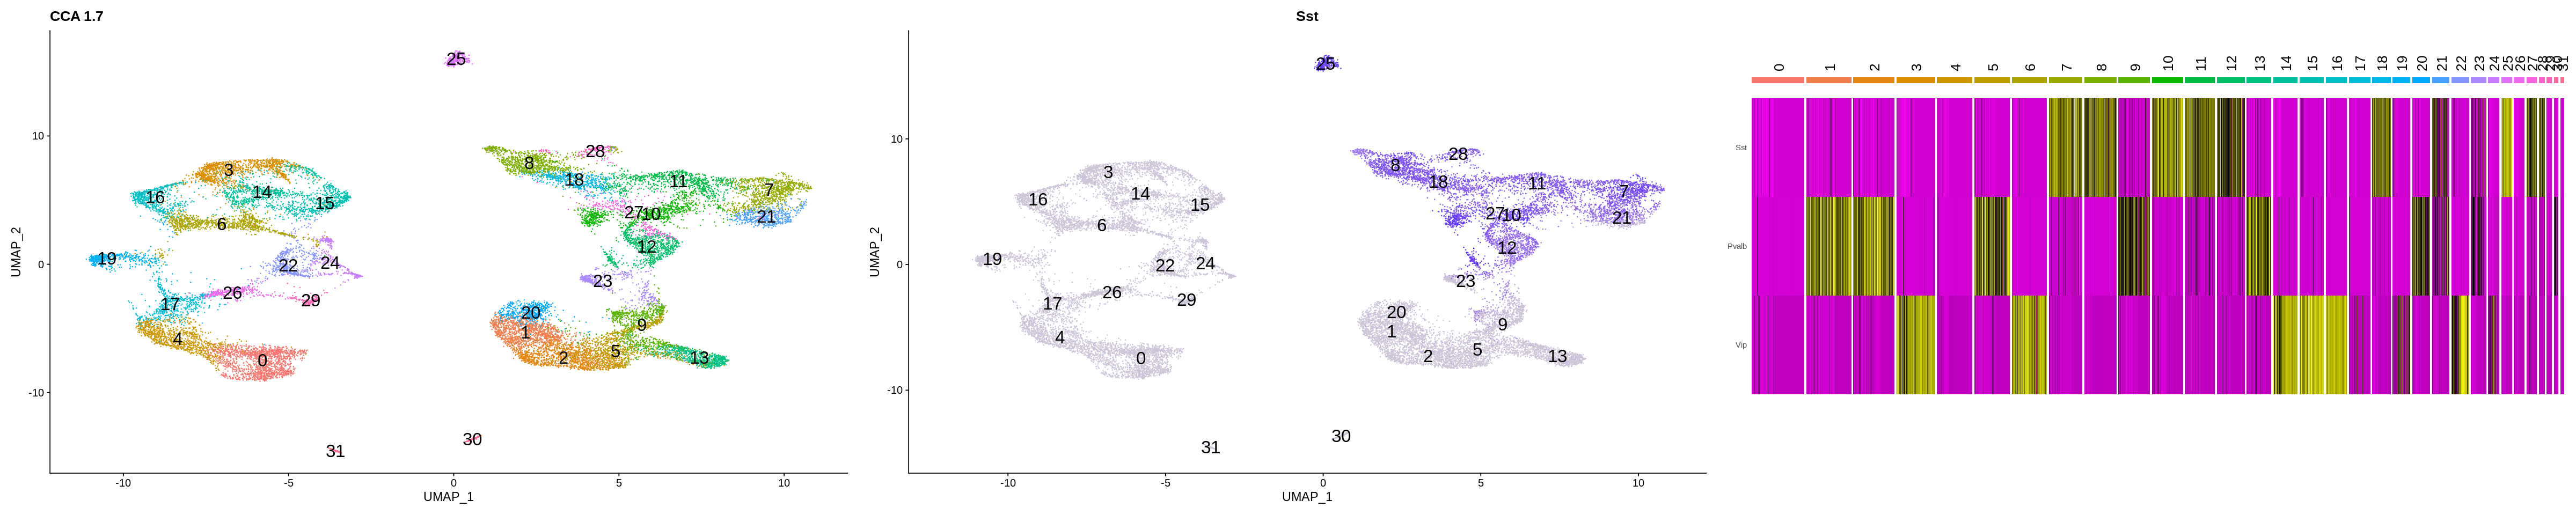

In [245]:
options(repr.plot.width = 40, repr.plot.height = 8)
plot_grid(nrow=1,
DimPlot(integrated, group.by='RNA_snn_res.2.1', label = T, label.size = 7) + NoLegend(),
DimPlot(integrated, group.by='supertype_label', label = T, label.size = 7) + NoLegend(),
         DoHeatmap(integrated, group.by='sherry_clusters', features = c('Sst','Pvalb','Vip'),angle = 90)+NoLegend())
ggsave('cca_umaps_a.pdf',height = 12, width = 40)
P28_sst@meta.data$`RNA_snn_res.2.1` = droplevels(P28_sst@meta.data$`RNA_snn_res.2.1`)
plot_grid(nrow=1,
DimPlot(P28, label=T, group.by = 'RNA_snn_res.2.1',label.size = 7)+NoLegend(),
DimPlot(P28_sst, label=T,label.size = 7)+NoLegend()+ggtitle('sst @ 2.1'),
          DoHeatmap(P28_sst, group.by='RNA_snn_res.2.1', features = c('Sst','Pvalb','Vip'),angle = 90)+NoLegend()
         )
ggsave('cca_umaps_b.pdf',height = 12, width = 40)
plot_grid(nrow=1,
DimPlot(integrated, label=T,label.size = 7)+NoLegend()+ggtitle('CCA 1.7'),
FeaturePlot(integrated, c('Sst'),label=T,label.size = 7)+NoLegend(),
         DoHeatmap(integrated, features = c('Sst','Pvalb','Vip'),angle = 90)+NoLegend())

ggsave('cca_umaps_c.pdf',height = 12, width = 40)


In [182]:
P28_sst_a = AverageExpression(P28_sst,return.seurat = T, verbose = F)

Warning message:
“The following arguments are not used: row.names”


Warning message:
“The following arguments are not used: row.names”


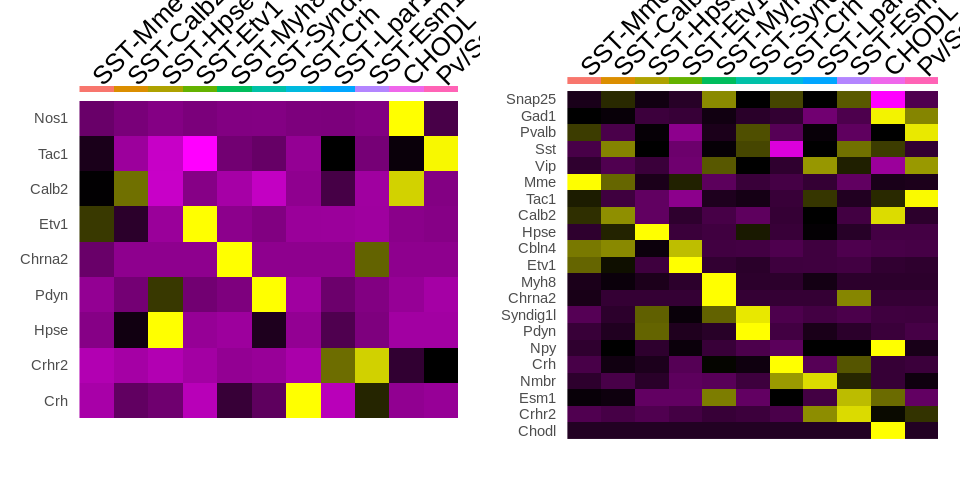

In [192]:
P28_sst@meta.data$sherry_clusters = dplyr::recode(P28_sst@meta.data$seurat_clusters,
'4' ='SST-Calb2', 
'8'='SST-Crh',
'9'='SST-Myh8',
'10'='SST-Hpse',
'12'='SST-Mme',
'17'='SST-Lpar1',                                                  
'18'='SST-Esm1',
'22'='SST-Syndig1l',                                                  
'24'='CHODL',
'27'='SST-Etv1',
'25'='Pv/Sst Th')
options(repr.plot.width = 8, repr.plot.height = 4)
P28_sst@meta.data$sherry_clusters = droplevels(P28_sst@meta.data$sherry_clusters)
my_ord_s = c('SST-Mme', 'SST-Calb2', 'SST-Hpse', 'SST-Etv1','SST-Myh8', 'SST-Syndig1l', 'SST-Crh','SST-Lpar1', 'SST-Esm1', 'CHODL','Pv/Sst Th')
P28_sst@meta.data$sherry_clusters = factor(P28_sst@meta.data$sherry_clusters, levels=my_ord_s, ordered = T)
Idents(P28_sst) = 'sherry_clusters'
P28_sst_a = AverageExpression(P28_sst,return.seurat = T, verbose = F)

plot_grid(nrow = 1,
DoHeatmap(P28_sst_a,features = sst_marks_b,draw.lines = F)+NoLegend(),
DoHeatmap(P28_sst_a,features = sst_marks,draw.lines = F)+NoLegend()
)



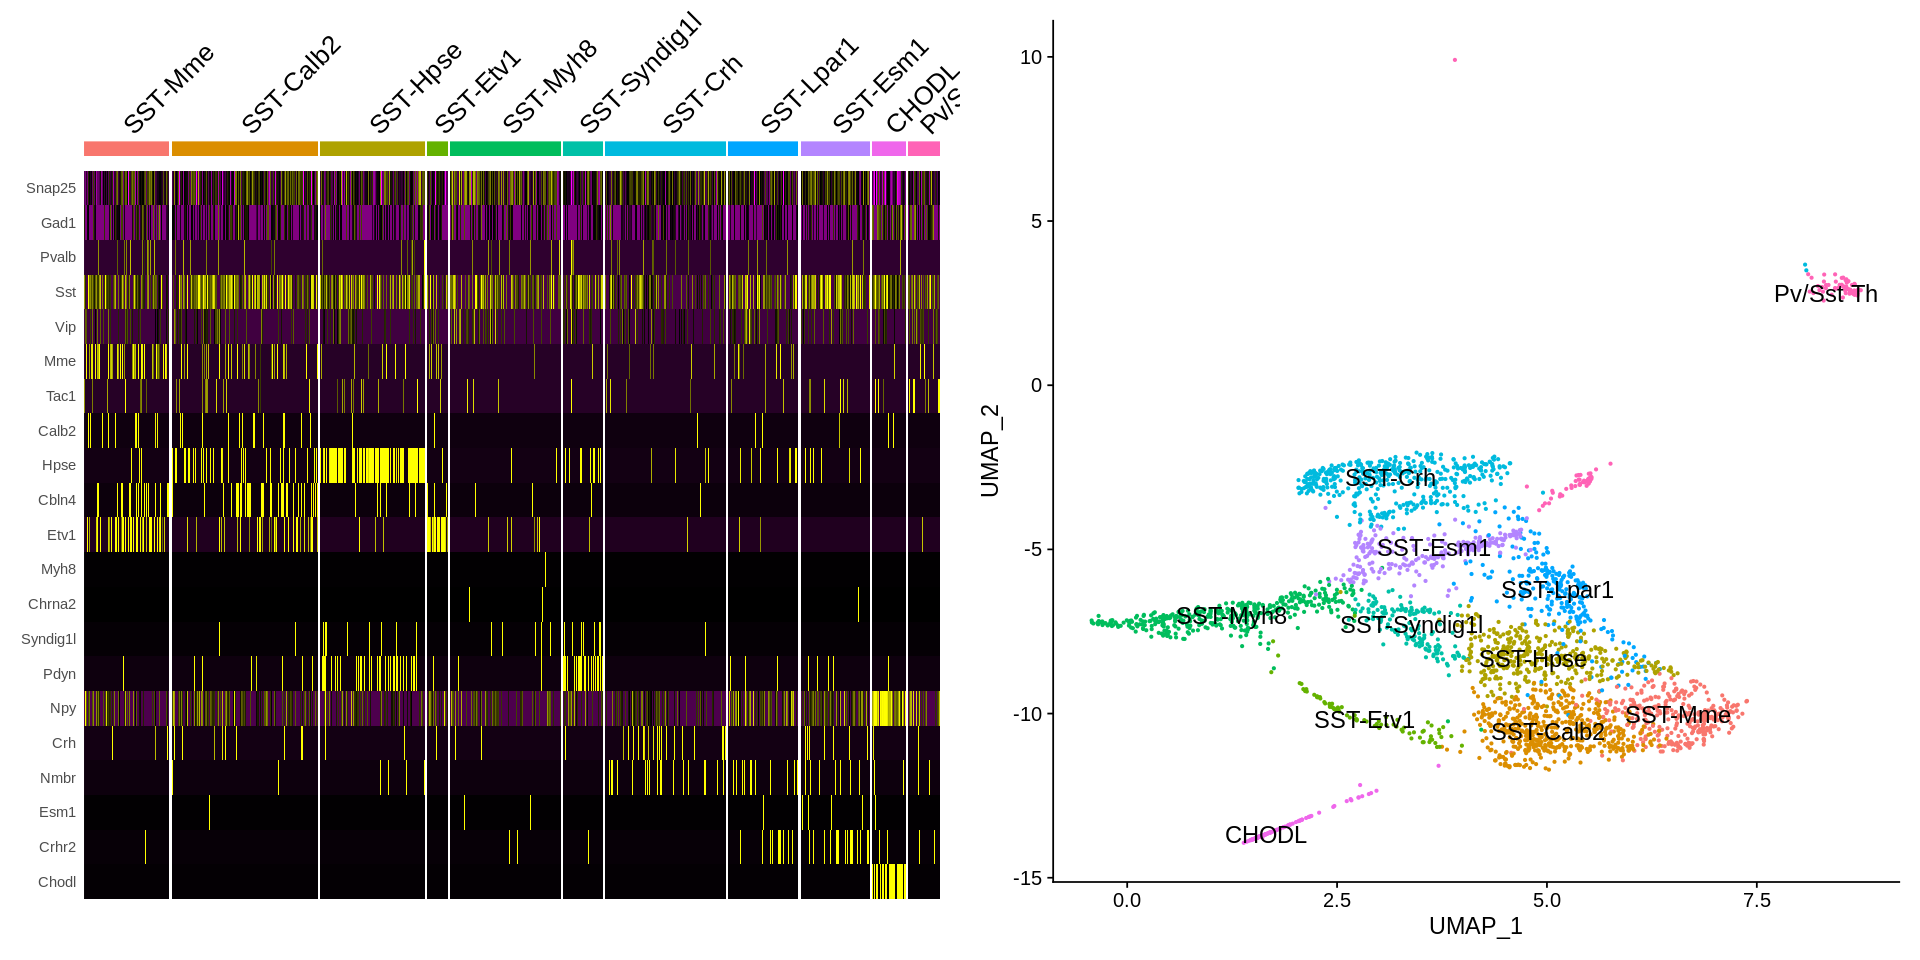

In [193]:
options(repr.plot.width = 16, repr.plot.height = 8)
plot_grid(nrow=1,
DoHeatmap(P28_sst,  features = sst_marks)+NoLegend(),
DimPlot(P28_sst, label=T,label.size = 5 )+NoLegend())

## P28 marker gene heatmap v1
* combine SST-Lpar1, SST-Esm1 as SST-Nmbr
* w/o PV/SST-Th

Warning message:
“The following arguments are not used: row.names”
Saving 6.67 x 6.67 in image



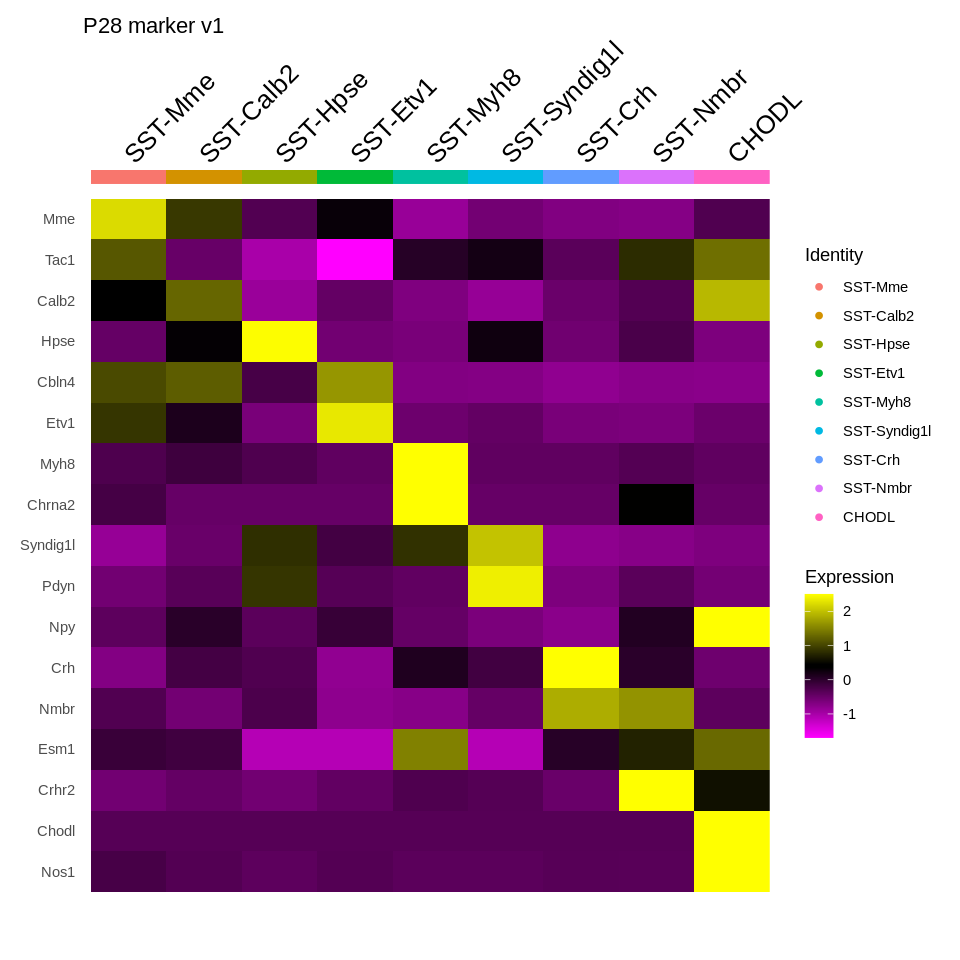

In [234]:
P28_hmap_v1 = subset(P28_sst, sherry_clusters !='Pv/Sst Th')
P28_hmap_v1@meta.data$sherry_clusters = recode(P28_hmap_v1@meta.data$sherry_clusters,
                                               'SST-Esm1'='SST-Nmbr',
                                               'SST-Lpar1'='SST-Nmbr')
my_ord_v1 = c('SST-Mme', 'SST-Calb2', 'SST-Hpse', 'SST-Etv1','SST-Myh8',
              'SST-Syndig1l', 'SST-Crh','SST-Nmbr', 'CHODL')
P28_hmap_v1@meta.data$sherry_clusters = factor(droplevels(P28_hmap_v1@meta.data$sherry_clusters),
                                           levels=my_ord_v1, 
                                           ordered = T)
Idents(P28_hmap_v1) = 'sherry_clusters'
hmap_marks = c('Mme', 'Tac1', 'Calb2', 'Hpse', 'Cbln4', 'Etv1', 'Myh8',
               'Chrna2', 'Syndig1l', 'Pdyn', 'Npy', 'Crh', 'Nmbr', 'Esm1',
               'Crhr2', 'Chodl', 'Nos1')

P28_hmap_a = AverageExpression(P28_hmap_v1,return.seurat = T, verbose = F)
options(repr.plot.width = 8, repr.plot.height = 8)
DoHeatmap(P28_hmap_a, features = hmap_marks,draw.lines = F)+ggtitle('P28 marker v1')
ggsave('P28_marker_v1.pdf')

## P28 marker gene heatmap v2 
* keep SST-Lpar1, SST-Esm1 separate
* w/o PV/SST-Th

Warning message:
“The following arguments are not used: row.names”
Saving 6.67 x 6.67 in image



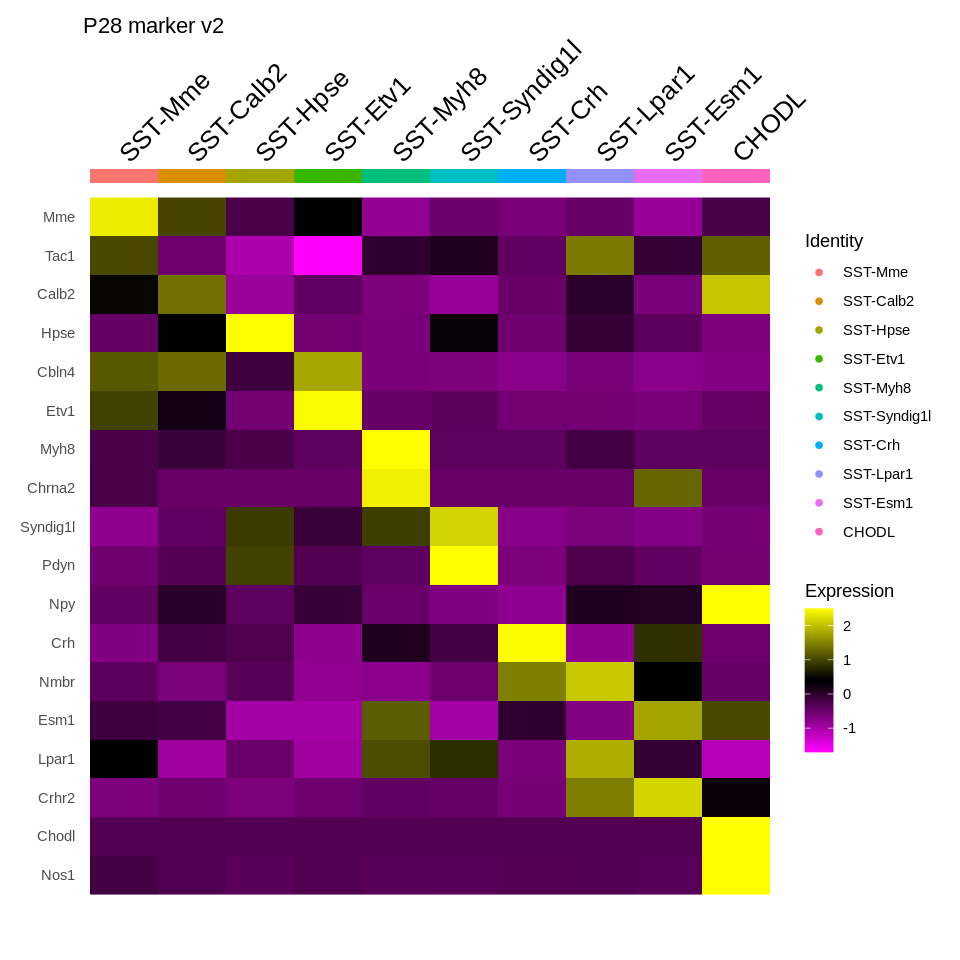

In [233]:
P28_hmap_v2 = subset(P28_sst, sherry_clusters !='Pv/Sst Th')
P28_hmap_b = AverageExpression(P28_hmap_v2,return.seurat = T, verbose = F)
hmap_marks = c('Mme', 'Tac1', 'Calb2', 'Hpse', 'Cbln4', 'Etv1', 'Myh8',
               'Chrna2', 'Syndig1l', 'Pdyn', 'Npy', 'Crh', 'Nmbr', 'Esm1',
               'Lpar1','Crhr2', 'Chodl', 'Nos1')
 
options(repr.plot.width = 8, repr.plot.height = 8)
DoHeatmap(P28_hmap_b, features = hmap_marks,draw.lines = F) +ggtitle('P28 marker v2')
ggsave('P28_marker_v2.pdf')

Saving 6.67 x 6.67 in image



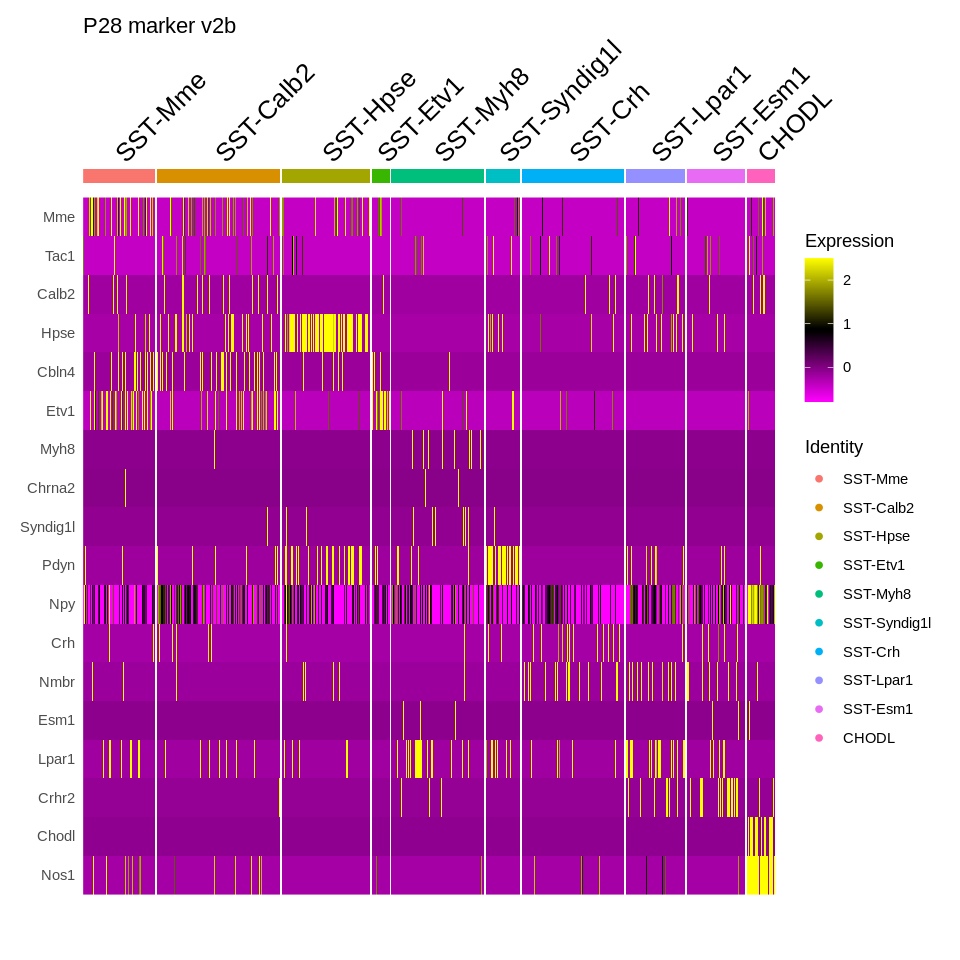

In [273]:
hmap_marks = c('Mme', 'Tac1', 'Calb2', 'Hpse', 'Cbln4', 'Etv1', 'Myh8',
               'Chrna2', 'Syndig1l', 'Pdyn', 'Npy', 'Crh', 'Nmbr', 'Esm1',
               'Lpar1','Crhr2', 'Chodl', 'Nos1')
 
options(repr.plot.width = 8, repr.plot.height = 8)
DoHeatmap(P28_hmap_v2, features = hmap_marks,draw.lines = T) +ggtitle('P28 marker v2b')
ggsave('./FIGURES/P28_marker_v2b.pdf')

## Allen marker heatmap v1

Warning message:
“The following arguments are not used: row.names”
Saving 6.67 x 6.67 in image



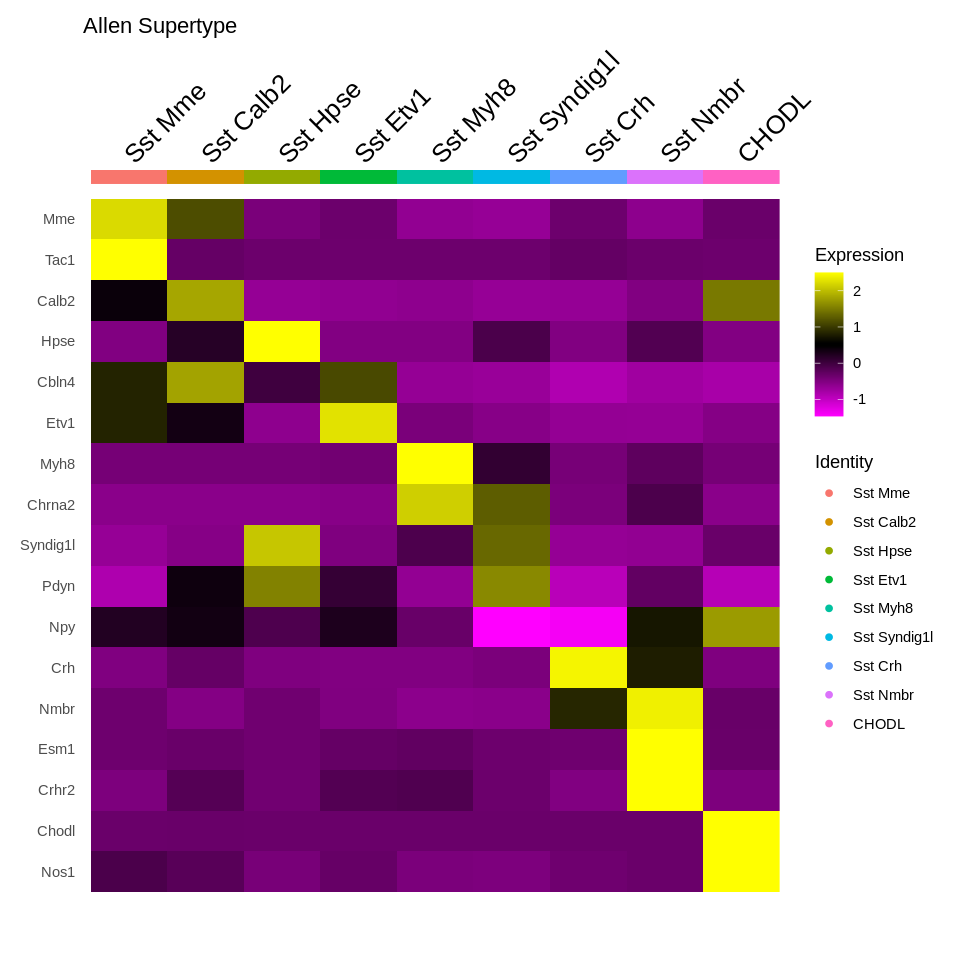

In [232]:
smrt_sst_sub = subset(smrt_in, supertype_label %in% c('Sst Mme', 'Sst Calb2',
                                                      'Sst Hpse', 'Sst Etv1','Sst Myh8',
                                                      'Sst Syndig1l', 'Sst Crh','Sst Nmbr',
                                                      'Sst Chodl'))
smrt_sst_sub@meta.data$supertype_label = recode(smrt_sst_sub@meta.data$supertype_label, `Sst Chodl` = 'CHODL')
my_ord_smrt = c('Sst Mme', 'Sst Calb2',
              'Sst Hpse', 'Sst Etv1','Sst Myh8',
              'Sst Syndig1l', 'Sst Crh','Sst Nmbr',
              'CHODL')
smrt_sst_sub@meta.data$supertype_label = factor(smrt_sst_sub@meta.data$supertype_label,
                                           levels=my_ord_smrt, 
                                           ordered = T)
Idents(smrt_sst_sub) = 'supertype_label'
hmap_marks = c('Mme', 'Tac1', 'Calb2', 'Hpse', 'Cbln4', 'Etv1', 'Myh8',
               'Chrna2', 'Syndig1l', 'Pdyn', 'Npy', 'Crh', 'Nmbr', 'Esm1',
               'Crhr2', 'Chodl', 'Nos1')

smrt_sst_sub_a = AverageExpression(smrt_sst_sub,return.seurat = T, verbose = F)
options(repr.plot.width = 8, repr.plot.height = 8)
DoHeatmap(smrt_sst_sub_a, features = hmap_marks,draw.lines = F)+ggtitle('Allen Supertype')
ggsave('allen_hmap_v1.pdf')

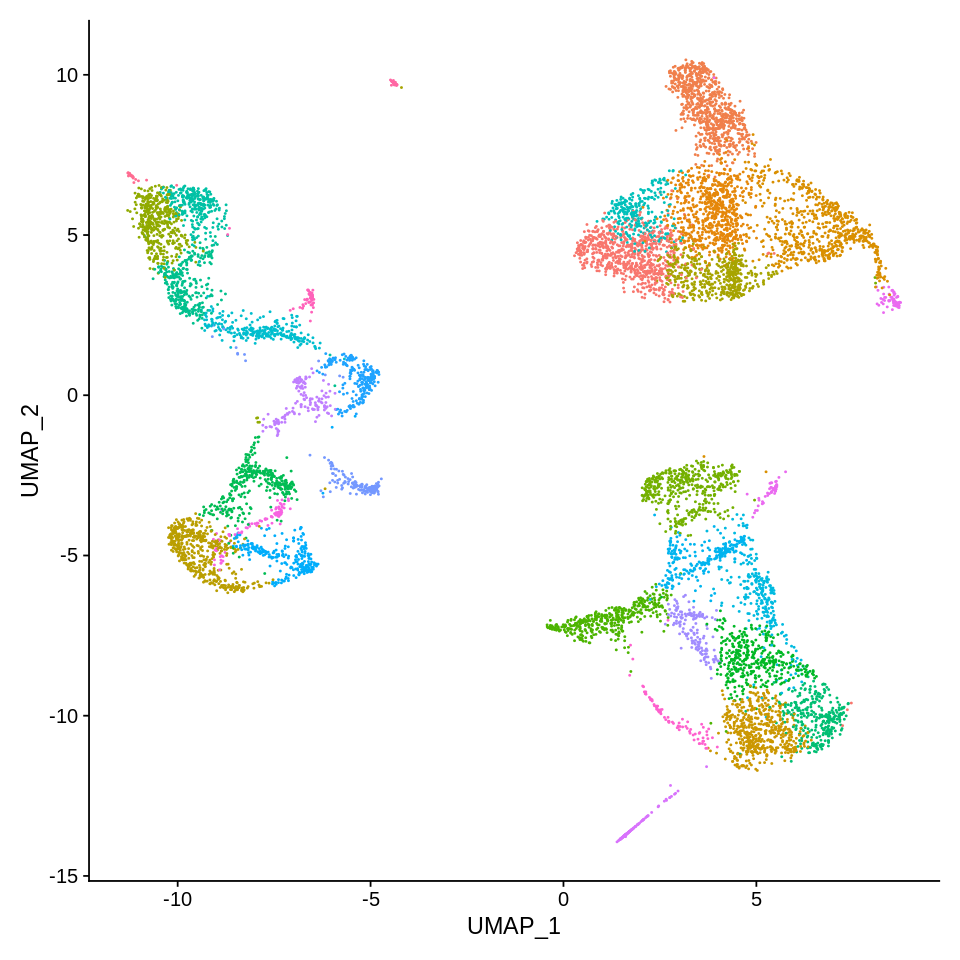

In [236]:
DimPlot(P28)+NoLegend()
ggsave('P28_umap_no_labels.pdf',height = 10,width = 10)

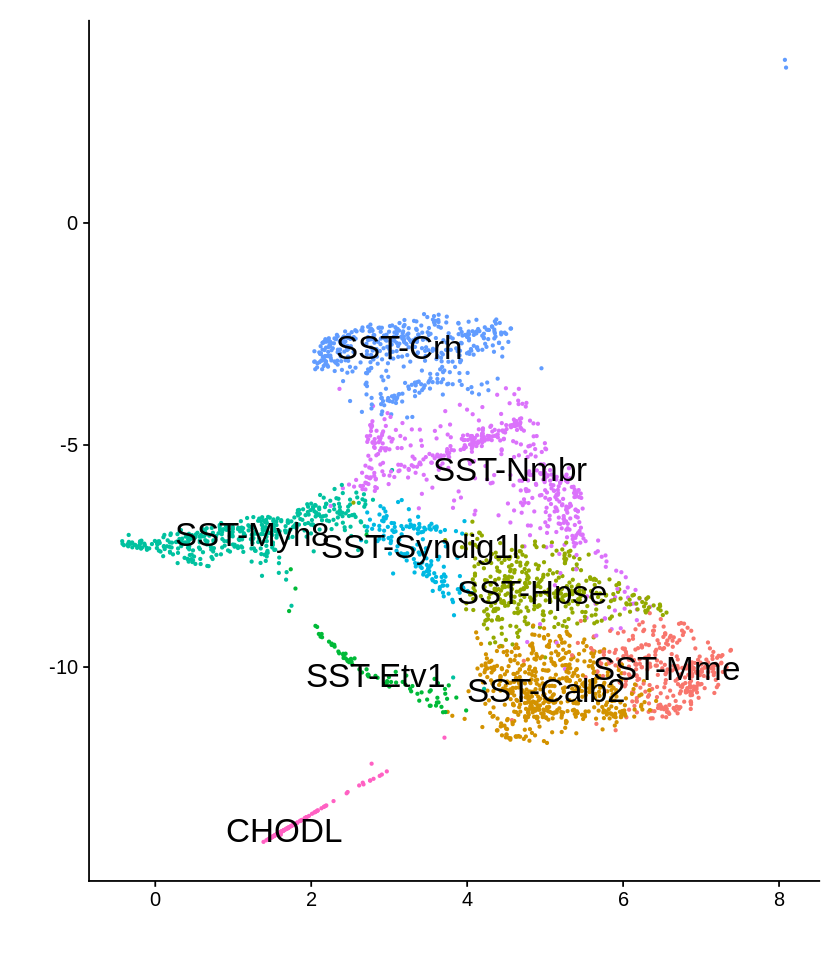

In [242]:
options(repr.plot.width = 7, repr.plot.height = 8)
DimPlot(P28_hmap_v1, label=T, label.size = 7)+NoLegend()+xlab('')+ylab('')
ggsave('P28_sst_umap_allen_labels.pdf',height = 8,width = 7)


In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)
DimPlot(smrt_sst_subt(cmb,), group.by='supertype_label', label=T)+NoLegend()
ggsave('./FIGURES/allen_IN_EXC_NN_umap.pdf', height = 16, width = 16)



Warning message:
“Removed 18 rows containing missing values (geom_point).”


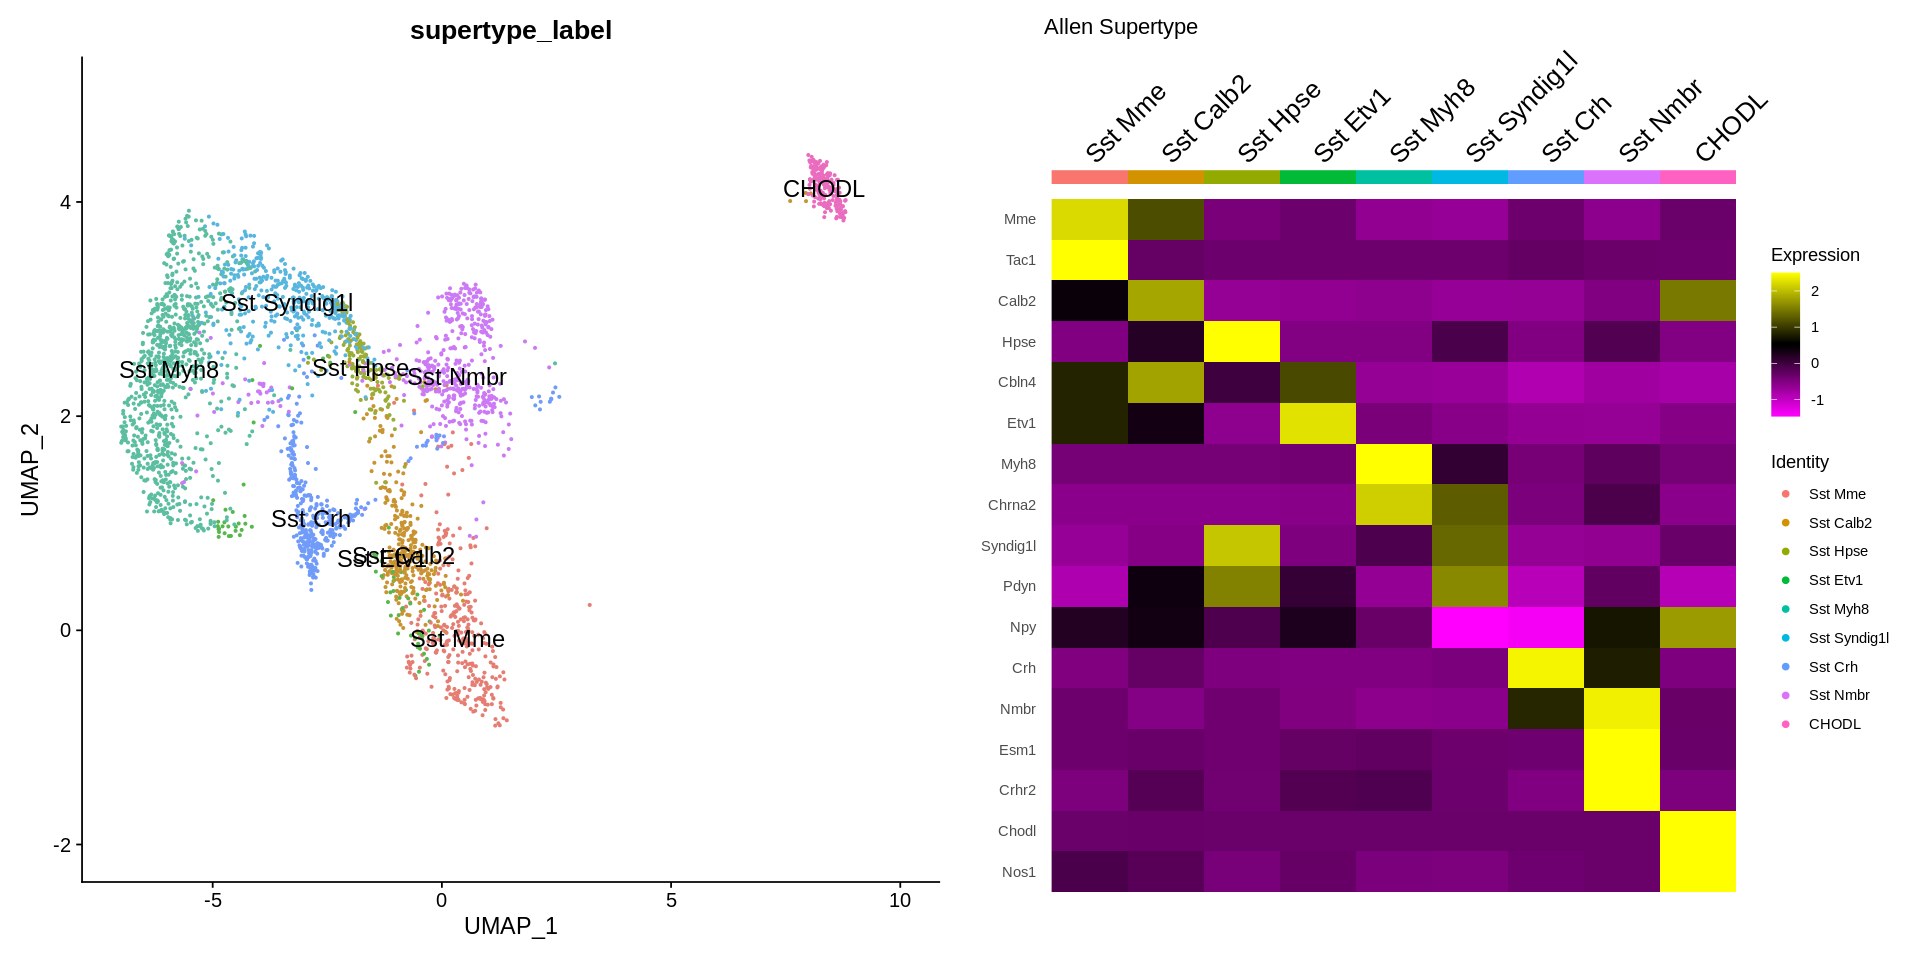

In [270]:
options(repr.plot.width = 16, repr.plot.height = 8)
# smrt_sst_sub@meta.data$supertype_label = factor(smrt_sst_sub@meta.data$supertype_label)
Idents(smrt_sst_sub) = 'supertype_label'
plot_grid(nrow=1,
DimPlot(smrt_sst_sub, group.by='supertype_label', label=T, label.size = 5)+NoLegend()+scale_color_manual(
    values=list('Sst Mme'='#E57D72', 'Sst Calb2'='#C89432',
              'Sst Hpse'='#9BAC37', 'Sst Etv1'='#58B74C','Sst Myh8'='#5CBEA0',
              'Sst Syndig1l'='#58B6DE', 'Sst Crh'='#709BF8','Sst Nmbr'='#CB79F4',
              'CHODL'='#EA6CBF')) + xlim(-7,10) + ylim(-2,5),
DoHeatmap(smrt_sst_sub_a, features = hmap_marks,draw.lines = F)+ggtitle('Allen Supertype'))          
ggsave('./FIGURES/allen_SST_umap_hmap.pdf', height = 8, width = 16)

In [274]:
# save.image('Jun14_cca_ok.RDA')